<a href="https://colab.research.google.com/github/FilLTP89/teaching/blob/master/MIFO_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALERT 2023**

## **Artificial Neural Networks - Chapters 7 and 8**


Author: Filippo Gatti

### Disclaimer

This hands-on notebook is devoted to **artificial Neural Networks** ($\mathcal{NN}$) and it covers chapters 7 and 8.

In the following, the code cells introduced by a tag **[TODO]** are meant to be completed by you!

In [1]:
# basic packages
from IPython.display import Image
import numpy as np
import scipy
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib.colors import ListedColormap

# This is required only for notebooks
%matplotlib inline

-----

## **Preliminaries**: practicing with `python3`

Before getting started, a few general hints:

1. `lambda` constructors: they are used in `python` to define anonymous functions ([see this link](https://realpython.com/python-lambda/))




In [2]:
import numpy as np

arr = np.array([1.5, 2.8, 3.1])
scale = lambda x: x * 3
scale(arr)

array([4.5, 8.4, 9.3])

2. Handle `pandas` dataframe

In [3]:

Image(url="https://www.tutorialspoint.com/python_pandas/images/structure_table.jpg",width=500)

In [4]:
# Empty dataframe
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [5]:
# Basic database
data = [1,2,3,4,5]
df = pd.DataFrame(data)
print(df.describe())

              0
count  5.000000
mean   3.000000
std    1.581139
min    1.000000
25%    2.000000
50%    3.000000
75%    4.000000
max    5.000000


In [6]:
# Database with column labels
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'])
print(df)

     Name  Age
0    Alex   10
1     Bob   12
2  Clarke   13


In [7]:
# Repartitioning data into dataframe
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'],dtype=float)
print(df)

     Name   Age
0    Alex  10.0
1     Bob  12.0
2  Clarke  13.0


<ipython-input-7-35e8499ffd27>:3: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  df = pd.DataFrame(data,columns=['Name','Age'],dtype=float)


In [8]:
# Deal with indices
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data, index=['rank1','rank2','rank3','rank4'])
print(df)

        Name  Age
rank1    Tom   28
rank2   Jack   34
rank3  Steve   29
rank4  Ricky   42


3. plot data: ([see this link](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py))



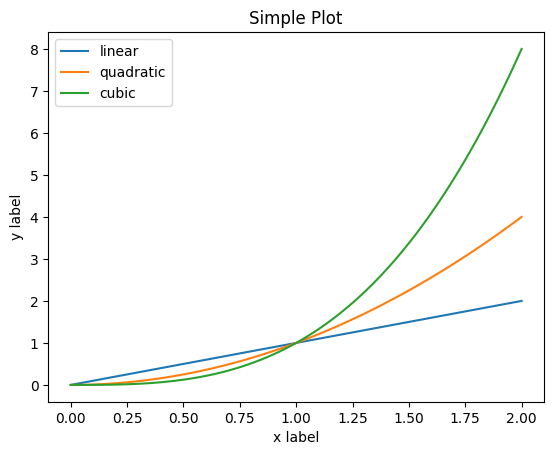

In [9]:
x = np.linspace(0, 2, 100)
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
plt.show()

# **Exercise 1** Non-linear regressions of real functions with $\mathcal{MLP}$

The aim of this task is to get acquainted with non-linear polynomial regressions. In this task, the following *kindergarten* equation is considered:

$$f(x) = \sin(30 \cdot (x-0.9)^4)\cos(2 \cdot (x-0.9))+\frac{x-0.9}{2}$$

Given the equation above, solve the following issues:

## - Step 1 **[TODO]**: Plot $f(x)$ and evaluate it at $N$=100 random points $x_i\sim\mathcal{U}\left[0,1\right]$

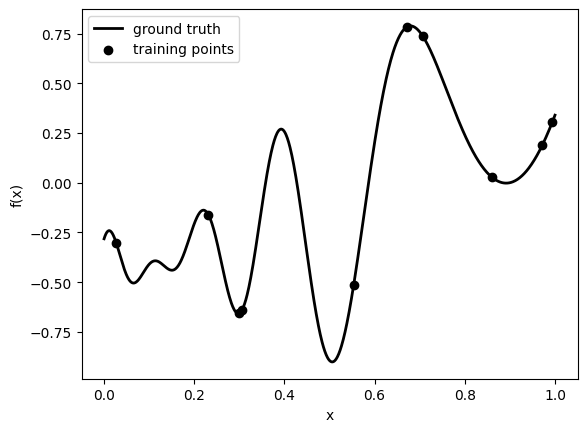

In [10]:
import numpy
# Grant reproductibility
np.random.seed(0)
N = 10
x_plot = np.linspace(0, 1, N*100)
rng = np.random.RandomState(0)
x_train = np.sort(rng.choice(x_plot,
                             size=N,
                             replace=False))
def f(x):
    return np.sin(30.0*(x-0.9)**2)*np.cos(2.0*(x-0.9))+0.5*(x-0.9)
y_train = f(x_train)

# create 2D-array versions of these arrays to feed to transformers
X_train = x_train[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

# plot function
lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen", "gold", "darkorange", "tomato"]
)
ax.plot(x_plot, f(x_plot), linewidth=lw, label="ground truth")

# plot training points
ax.scatter(x_train, y_train, label="training points")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()



## - Step 2 **[TODO]**: Fit the selected points for different polynomial orders (hint: 3,4,5,... or piece-wise polynomials). Show the fitting improvements obtained when changing the polynomial order.

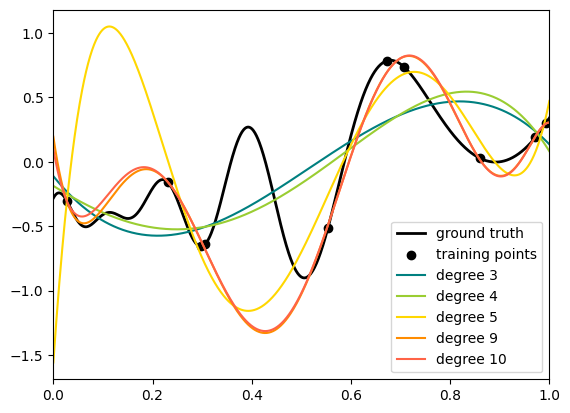

In [11]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer

lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen",
           "gold", "darkorange", "tomato",
           "skyblue"]
)
ax.plot(x_plot, f(x_plot), linewidth=lw, label="ground truth")

# plot training points
ax.scatter(x_train, y_train, label="training points")

# polynomial features
alpha = 1e-10# penalty coefficient
for degree in [3, 4, 5, 9, N]:
    model = make_pipeline(PolynomialFeatures(degree),
                          Ridge(alpha=alpha))
    model.fit(X_train, y_train)
    y_plot = model.predict(X_plot)
    ax.plot(x_plot, y_plot, label=f"degree {degree}")


ax.legend()
ax.set_xlim(0, 1)
plt.show()


## - Step 3 **[TODO]**: How the fit improves when considering 100, 1000 random points?

(0.0, 1.0)

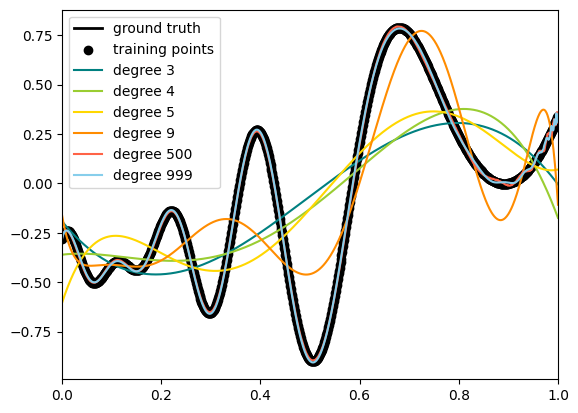

In [12]:
N = 1000
x_train = np.sort(rng.choice(x_plot,
                             size=N,
                             replace=False))
y_train = f(x_train)
X_train = x_train[:, np.newaxis]

lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen",
           "gold", "darkorange", "tomato",
           "skyblue"]
)
ax.plot(x_plot, f(x_plot), linewidth=lw, label="ground truth")

# plot training points
ax.scatter(x_train, y_train, label="training points")
# polynomial features
alpha =0 # penalty coefficient
for degree in [3, 4, 5, 9, N//2, N-1]:
    model = make_pipeline(PolynomialFeatures(degree),
                          Ridge(alpha=alpha))
    model.fit(X_train, y_train)
    y_plot = model.predict(X_plot)
    ax.plot(x_plot, y_plot, label=f"degree {degree}")


ax.legend()
ax.set_xlim(0, 1)

## - Step 4 **[TODO]**:  Design a $\mathcal{MLP}$ to fit the curve sampled with 10, 100, 1000 points respectively. Use the least number of layers and neurons possible.

## - Step 4.1 **[TODO]**:  create and split dataset



In [13]:
import torch
torch.manual_seed(0)

In [14]:
'''[TODO] Create dataset'''
from sklearn.model_selection import train_test_split

m = torch.distributions.Uniform(torch.zeros(1),
                                torch.ones(1))

N = 1000
X = m.sample((N,)).to(torch.float32)

# split into train and test sets
# Hint: use the sklearn function `train_test_split`
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    f(X),
                                                    train_size=0.7,
                                                    shuffle=True)

## - Step 4.2 **[TODO]**:  design the $\mathcal{MLP}$

In [15]:
from torch import nn
'''[TODO] Design MLP'''

fan_in = 4
h_theta = nn.Sequential(
    nn.Linear(1, fan_in), # hidden layer pre-activation
    nn.ReLU(),            # hidden layer activation
    nn.Linear(fan_in, 1), # output layer
    nn.Flatten()
)

## - Step 4.3 **[TODO]**:  choose the optimizer

In [16]:
'''[TODO] Optimization setup'''
# Define the loss function
loss_fn = nn.MSELoss()

# number of epochs
n_e = 800

# batch size and batch per epochs
batch_size = 200
batches_per_epoch = len(X_train) // batch_size

# Optimizer
learning_rate = 0.0001
beta1 = 0.9 # Adam coefficients
beta2 = 0.999 # Adam coefficients
epsilon = 1e-8 # tolerance
optimizer = torch.optim.Adam(h_theta.parameters(),
                             lr = learning_rate,
                             betas=(beta1, beta2),
                             eps=epsilon)

## - Step 4.4 **[TODO]**:  train the $\mathcal{MLP}$

In [17]:
'''[TODO] Train the hidden-layer MLP'''
import tqdm
train_loss_hist = []
test_loss_hist = []
for epoch in range(n_e):
    epoch_loss = []
    # set model in training mode
    h_theta.train()

    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # infer (forward)
            y_pred = h_theta(X_batch).squeeze()
            # compute the loss
            loss = loss_fn(y_pred, y_batch)
            # reset previously saved gradients and empty the optimizer memory
            optimizer.zero_grad()
            # run backward propagation
            loss.backward()
            # update weights
            optimizer.step()
            # compute and store metrics
            epoch_loss.append(float(loss))

    # set model in evaluation mode to infer the class in the test set
    # without storing gradients for brackprop
    h_theta.eval()
    # infer the class over the test set
    y_pred = h_theta(X_test).squeeze()
    acc = float(loss_fn(y_pred, y_test))
    train_loss_hist.append(np.mean(epoch_loss))
    test_loss_hist.append(acc)
    # print(f"Epoch {epoch} validation: MSE={acc:.1f}")

Epoch 0:   0%|          | 0/3 [00:00<?, ?batch/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([200, 1])) that is different to the input size (torch.Size([200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Epoch 0: 100%|██████████| 3/3 [00:00<00:00, 24.05batch/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([300, 1])) that is different to the input size (torch.Size([300])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Epoch 799: 100%|██████████| 3/3 [00:00<00:00, 151.40batch/s]


## - Step 4.5 **[TODO]**:  plot the learning curves and the comparison between test data and prediction from trained $\mathcal{MLP}$

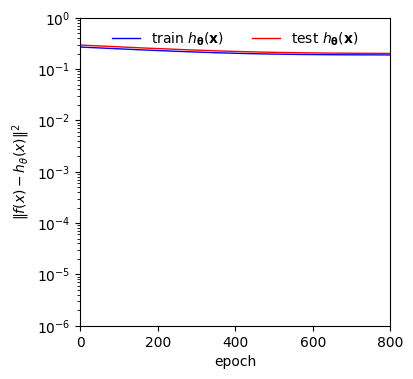

In [18]:
fig, ax = plt.subplots(figsize=(4,4))
ax.semilogy(train_loss_hist,
            color='b',
            linewidth=1,
            label=r"train $h_{\mathbf{\theta}}(\mathbf{x})$")
ax.semilogy(test_loss_hist,
            color='r',
            linewidth=1,
            label=r"test $h_{\mathbf{\theta}}(\mathbf{x})$")
ax.set_xlabel("epoch")
ax.set_ylabel(r"$\Vert f(x)-h_\theta(x) \Vert^2$")
ax.set_xlim(0,n_e)
ax.set_ylim(1e-6,1e0)
ax.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.0),ncol=2,)
fig.savefig("mse_fx_compare.png", dpi=300, bbox_inches="tight")

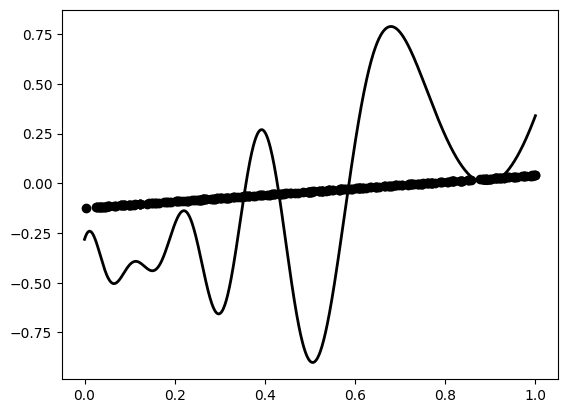

In [19]:
h_theta.eval()

lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen",
           "gold", "darkorange", "tomato",
           "skyblue"]
)
ax.plot(x_plot, f(x_plot), linewidth=lw, label="ground truth")

ax.scatter(X_test.cpu().numpy(),h_theta(X_test).detach().cpu().numpy())

# **Exercise 2**: Approximate an approximately-radial function with $\mathcal{MLP}$ (see Section 2.4, Chapter 7)

## **Quick facts**


- Despite the fact that Universal approximation theorem for a 1-hidden-layered perceptron (see Theorem 24, Chapter 8) proves the universal approximation capability of a 1-hidden-layer $\mathcal{MLP}$, provided that enough neurons are considered, this result is quite hard to exploit in real applications, since the number of neurons can easily become too large to handle from a computational standpoint.

- Eldan and Shamir [1] showed that it exists an approximately radial function $\varphi(\mathbf{x}):\mathbb{R}^{d_X}\to\mathbb{R}$, $\varphi: \mathbf{x}\mapsto\varphi(\Vert\mathbf{x}\Vert)$ that can be approximated by a ``small`` (bounded number of neurons) 2-hidden-layers $\mathcal{MLP}$ with arbitrary accuracy, but that cannot be approximated by a 1-hidden-layer $\mathcal{MLP}$ below a certain accuracy, unless the number of neurons $N_K$ grows exponentially with $d_X$.

- In particular, this results is valid for any activation function $g$ and with no further constraint on the weights and biases adopted in the $\mathcal{MLP}$ (on the contrary, the Universal Approximation Theorem requires that the high-frequency components $\Vert \mathbf{w}_n\Vert$ are smaller than a constant).




### *Bibliography*:

[1] Eldan, R.; Shamir, O. The Power of Depth for Feedforward Neural Networks. In Workshop and Conference Proceedings; PMLR, 2016; Vol. 49, pp 1--34. url: https://proceedings.mlr.press/v49/eldan16

## **Questions**

- What kind of functions cannot be approximated with a *reasonable* accuracy by a $\mathcal{MLP}$ of $N_\ell$ layers?

- How many neurons should be considered for each layer?

- What is the effect of having a number of layers that is higher than the number of neurons per layer?

## **Learning Outcomes**

- This results proves that increasing the depth of the $\mathcal{MLP}$ widens the approximation capability of the $\mathcal{MLP}$ and that the depth of the $\mathcal{MLP}$ should be privileged with the respect to its layer dimension (but being careful to avoid vanishing
gradient problems).

## **Objective**

In the following, you are asked to conceive a multi-layer feed-forward $\mathcal{MLP}$ to approximate the following approximately-radial function and compare the accuracy obtained with 1-hidden layer and with 2-hidden layers. The approximately-radial function is defined as:

$$\varphi(\mathbf{x}) = \left(\frac{R_{d_X}}{\Vert\mathbf{x}\Vert}\right)^{\frac{d_X}{2}}J_{\frac{d_X}{2}}(2\pi R_{d_X}\Vert\mathbf{x}\Vert)  =\int_{\mathbf{w}:\Vert\mathbf{w}\Vert\le R_d} e^{-2\pi i \langle \mathbf{x}, \mathbf{w}\rangle} d\mathbf{w}\phantom{}^{(1)}
$$

with $J_{\frac{d_X}{2}}(2\pi R_{d_X}\Vert\mathbf{x}\Vert)$ the Bessel function of first kind of order $\frac{d_X}{2}$. In the following, consider $d_X=2$.

**$\phantom{}^{(1)}$Note**: The approximately radial function is the inverse Fourier transform of the indicator function on a unit volume euclidean ball $B_{R_{d_X}}(0)$, of radius $R_{d_X}$ such that its volume $V_{d_X}(R_{d_X}) = 1$.

## - Step 1: compute and plot the approximately-radial function $\varphi$ on, restricted to a compact set $\mathcal{X}_{\square}=\left[-l_x,l_x\right]\times\left[-l_y,l_y\right]\subset\mathbb{R}^2$ over a discrete regular grid of $n_x\times n_y$ points.

In [20]:
'''Define grid in R2'''
lx = 10.0
ly = 10.0
x_lim = np.array([-lx,lx], dtype=np.float64) # x-bounds
y_lim = np.array([-ly,ly], dtype=np.float64) # y-bounds

nx = 1001 # number of grid points along x
ny = 1001 # number of grid points along y
# vector of coordinates along x
xv = np.linspace(x_lim[0], x_lim[1], nx, endpoint=True)
# vector of coordinates along y
yv = np.linspace(y_lim[0], y_lim[1], ny, endpoint=True)
# define mesh grid
yg, xg = np.meshgrid(yv,xv)

## - Step 2: evaluate $\varphi$ over the grid and plot it

<ipython-input-21-ee7b9aaea250>:5: RuntimeWarning: divide by zero encountered in divide
  phi = (R_d/(np.sqrt(xg**2+yg**2)))**(int(d_X//2))*jv(int(d_X//2),
<ipython-input-21-ee7b9aaea250>:5: RuntimeWarning: invalid value encountered in multiply
  phi = (R_d/(np.sqrt(xg**2+yg**2)))**(int(d_X//2))*jv(int(d_X//2),


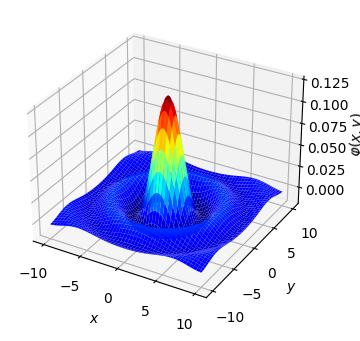

In [21]:
'''Define varphi(x,y) over the grid'''
from scipy.special import jv # Bessel function
d_X = 2 # dimension of the problem
R_d = 0.2 # radius
phi = (R_d/(np.sqrt(xg**2+yg**2)))**(int(d_X//2))*jv(int(d_X//2),
                                                     2.0*np.pi*R_d*np.sqrt(xg**2+
                                                                           yg**2))
fig = plt.figure(figsize=(4,4),)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xg, yg, phi, cmap=cm.jet)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$\varphi(x,y)$")
fig.savefig("radial_function.png", dpi=300, bbox_inches="tight")

## - Step 3 **[TODO]**: create the training and test datasets by uniformly sampling the function $\varphi$ over $\mathcal{X}_\square$.

In [22]:
''' [TODO] Create uniformly random grid of points for training'''
import torch
from sklearn.model_selection import train_test_split

# Grant reproductibility
torch.manual_seed(0)

# Hint: use the package torch.distributions
# https://pytorch.org/docs/stable/distributions.html
# for uniform distribution
m = torch.distributions.Uniform(torch.tensor([x_lim[0], y_lim[0]]),
                torch.tensor([x_lim[1], y_lim[1]]))
X = m.sample((4000,)).to(torch.float32)
y = (R_d/(np.sqrt(X[:,0]**2+X[:,1]**2)))**(int(d_X//2))*jv(int(d_X//2),
                                                           2.0*np.pi*R_d*np.sqrt(
                                                              X[:,0]**2+
                                                              X[:,1]**2))

# split into train and test sets
# Hint: use the sklearn function `train_test_split`
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.7,
                                                    shuffle=True,
                                                    random_state=0)

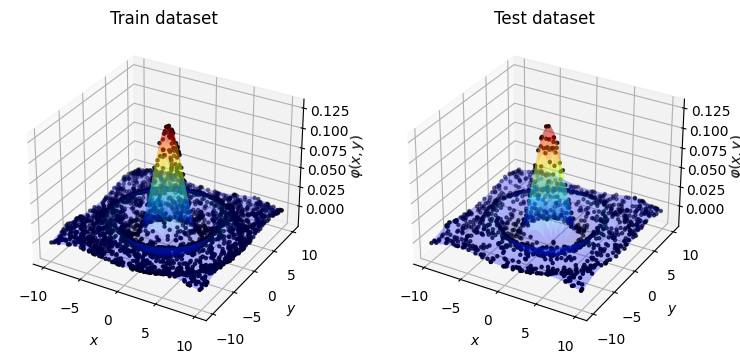

In [23]:
fig = plt.figure(figsize=(9,4),)
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(xg, yg, phi, cmap=cm.jet, alpha=0.3)
ax.scatter(X_train[:,0], X_train[:,1], y_train, color='k', s=5)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$\varphi(x,y)$")
ax.set_title("Train dataset")

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(xg, yg, phi, cmap=cm.jet, alpha=0.3)
ax.scatter(X_test[:,0], X_test[:,1], y_test, color='k', s=5)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$\varphi(x,y)$")
ax.set_title("Test dataset")
fig.savefig("train_test_radial_function.png", dpi= 300, bbox_inches="tight")

## - Step 4 **[TODO]**: Define a 1-hidden layer $\mathcal{MLP}$ $h_\theta^{(1)}$ and a 2-hidden layers $\mathcal{MLP}$ $h_\theta^{(2)}$ for further comparisons, using the `torch.nn` package. Adopt an adequate number of of hidden neurons for both cases.

**Note**: use $ReLU$ activation functions and linear output layer.

In [24]:
from torch import nn

In [25]:
'''[TODO] Define 1-hidden-layer MLP selecting an adequate fan_in'''
fan_in = 10000
h_theta1 = nn.Sequential(
    nn.Linear(2, fan_in), # hidden layer pre-activation
    nn.ReLU(),            # hidden layer activation
    nn.Linear(fan_in, 1), # output layer
    nn.Flatten()
)

In [26]:
'''[TODO] Define 2-hidden-layer MLP'''
fan_in = 100
h_theta2 = nn.Sequential(
    nn.Linear(2, fan_in),      # hidden layer 1 pre-activation
    nn.ReLU(),                 # hidden layer 1 activation
    nn.Linear(fan_in, fan_in), # hidden layer 2 pre-activation
    nn.ReLU(),                 # hidden layer 2 activation
    nn.Linear(fan_in, 1),      # output layer
    nn.Flatten()
)

## - Step 5 **[TODO]**: Define the best optimizer for both $h_\theta^{(1)}$ and $h_\theta^{(2)}$. Choose the learning rate accordingly.

In [27]:
''' [TODO] Define the optimizer for 1-hidden-layer MLP'''
learning_rate1 = 0.0001
optimizer1 = torch.optim.AdamW(h_theta1.parameters(),
                               lr = learning_rate1)

In [28]:
''' [TODO] Define the optimizer for 2-hidden-layers MLP'''
learning_rate2 = 0.0001
optimizer2 = torch.optim.AdamW(h_theta2.parameters(),
                               lr = learning_rate2)

## - Step 6 **[TODO]**: setup the gradient descent strategy and the loss function. Optional: initialize the weights according to the best strategy.

In [29]:
''' [TODO] Gradient descent set up and loss function'''
# Define the loss function
loss_fn = nn.MSELoss()

# number of epochs
n_e = 1000

# batch size and batch per epochs
batch_size = 200
batches_per_epoch = len(X_train) // batch_size

## - Step 7 **[TODO]**: Train $h_\theta^{(1)}$ and $h_\theta^{(2)}$ and track the approximation error for training and testing sets.

In [30]:
''' [TODO] Train 1-hidden-layer MLP'''
import tqdm
train_loss_hist1 = []
test_loss_hist1 = []
for epoch in range(n_e):
    epoch_loss = []
    # set model in training mode
    h_theta1.train()

    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # infer (forward)
            y_pred = h_theta1(X_batch).squeeze()
            # compute the loss
            loss = loss_fn(y_pred, y_batch)
            # reset previously saved gradients and empty the optimizer memory
            optimizer1.zero_grad()
            # run backward propagation
            loss.backward()
            # update weights
            optimizer1.step()
            # compute and store metrics
            epoch_loss.append(float(loss))

    # set model in evaluation mode to infer the class in the test set
    # without storing gradients for brackprop
    h_theta1.eval()
    # infer the class over the test set
    y_pred = h_theta1(X_test).squeeze()
    acc = float(loss_fn(y_pred, y_test))
    train_loss_hist1.append(np.mean(epoch_loss))
    test_loss_hist1.append(acc)
    print(f"Epoch {epoch} validation: MSE={acc:.1f}")

Epoch 0: 100%|██████████| 14/14 [00:00<00:00, 54.22batch/s]


Epoch 0 validation: MSE=0.0


Epoch 1: 100%|██████████| 14/14 [00:00<00:00, 65.08batch/s]


Epoch 1 validation: MSE=0.0


Epoch 2: 100%|██████████| 14/14 [00:00<00:00, 62.49batch/s]


Epoch 2 validation: MSE=0.0


Epoch 3: 100%|██████████| 14/14 [00:00<00:00, 65.43batch/s]


Epoch 3 validation: MSE=0.0


Epoch 4: 100%|██████████| 14/14 [00:00<00:00, 65.27batch/s]


Epoch 4 validation: MSE=0.0


Epoch 5: 100%|██████████| 14/14 [00:00<00:00, 67.66batch/s]


Epoch 5 validation: MSE=0.0


Epoch 6: 100%|██████████| 14/14 [00:00<00:00, 66.68batch/s]


Epoch 6 validation: MSE=0.0


Epoch 7: 100%|██████████| 14/14 [00:00<00:00, 67.68batch/s]


Epoch 7 validation: MSE=0.0


Epoch 8: 100%|██████████| 14/14 [00:00<00:00, 67.70batch/s]


Epoch 8 validation: MSE=0.0


Epoch 9: 100%|██████████| 14/14 [00:00<00:00, 58.52batch/s]


Epoch 9 validation: MSE=0.0


Epoch 10: 100%|██████████| 14/14 [00:00<00:00, 68.58batch/s]


Epoch 10 validation: MSE=0.0


Epoch 11: 100%|██████████| 14/14 [00:00<00:00, 67.98batch/s]


Epoch 11 validation: MSE=0.0


Epoch 12: 100%|██████████| 14/14 [00:00<00:00, 61.68batch/s]


Epoch 12 validation: MSE=0.0


Epoch 13: 100%|██████████| 14/14 [00:00<00:00, 53.12batch/s]


Epoch 13 validation: MSE=0.0


Epoch 14: 100%|██████████| 14/14 [00:00<00:00, 77.01batch/s]


Epoch 14 validation: MSE=0.0


Epoch 15: 100%|██████████| 14/14 [00:00<00:00, 78.76batch/s]


Epoch 15 validation: MSE=0.0


Epoch 16: 100%|██████████| 14/14 [00:00<00:00, 80.88batch/s]


Epoch 16 validation: MSE=0.0


Epoch 17: 100%|██████████| 14/14 [00:00<00:00, 74.61batch/s]


Epoch 17 validation: MSE=0.0


Epoch 18: 100%|██████████| 14/14 [00:00<00:00, 72.59batch/s]


Epoch 18 validation: MSE=0.0


Epoch 19: 100%|██████████| 14/14 [00:00<00:00, 74.60batch/s]


Epoch 19 validation: MSE=0.0


Epoch 20: 100%|██████████| 14/14 [00:00<00:00, 78.04batch/s]


Epoch 20 validation: MSE=0.0


Epoch 21: 100%|██████████| 14/14 [00:00<00:00, 76.00batch/s]


Epoch 21 validation: MSE=0.0


Epoch 22: 100%|██████████| 14/14 [00:00<00:00, 72.84batch/s]


Epoch 22 validation: MSE=0.0


Epoch 23: 100%|██████████| 14/14 [00:00<00:00, 75.46batch/s]


Epoch 23 validation: MSE=0.0


Epoch 24: 100%|██████████| 14/14 [00:00<00:00, 74.63batch/s]


Epoch 24 validation: MSE=0.0


Epoch 25: 100%|██████████| 14/14 [00:00<00:00, 69.62batch/s]


Epoch 25 validation: MSE=0.0


Epoch 26: 100%|██████████| 14/14 [00:00<00:00, 78.05batch/s]


Epoch 26 validation: MSE=0.0


Epoch 27: 100%|██████████| 14/14 [00:00<00:00, 57.21batch/s]


Epoch 27 validation: MSE=0.0


Epoch 28: 100%|██████████| 14/14 [00:00<00:00, 64.68batch/s]


Epoch 28 validation: MSE=0.0


Epoch 29: 100%|██████████| 14/14 [00:00<00:00, 66.48batch/s]


Epoch 29 validation: MSE=0.0


Epoch 30: 100%|██████████| 14/14 [00:00<00:00, 63.92batch/s]


Epoch 30 validation: MSE=0.0


Epoch 31: 100%|██████████| 14/14 [00:00<00:00, 63.99batch/s]


Epoch 31 validation: MSE=0.0


Epoch 32: 100%|██████████| 14/14 [00:00<00:00, 73.20batch/s]


Epoch 32 validation: MSE=0.0


Epoch 33: 100%|██████████| 14/14 [00:00<00:00, 75.07batch/s]


Epoch 33 validation: MSE=0.0


Epoch 34: 100%|██████████| 14/14 [00:00<00:00, 68.02batch/s]


Epoch 34 validation: MSE=0.0


Epoch 35: 100%|██████████| 14/14 [00:00<00:00, 72.57batch/s]


Epoch 35 validation: MSE=0.0


Epoch 36: 100%|██████████| 14/14 [00:00<00:00, 63.68batch/s]


Epoch 36 validation: MSE=0.0


Epoch 37: 100%|██████████| 14/14 [00:00<00:00, 66.16batch/s]


Epoch 37 validation: MSE=0.0


Epoch 38: 100%|██████████| 14/14 [00:00<00:00, 66.46batch/s]


Epoch 38 validation: MSE=0.0


Epoch 39: 100%|██████████| 14/14 [00:00<00:00, 79.93batch/s]


Epoch 39 validation: MSE=0.0


Epoch 40: 100%|██████████| 14/14 [00:00<00:00, 80.23batch/s]


Epoch 40 validation: MSE=0.0


Epoch 41: 100%|██████████| 14/14 [00:00<00:00, 78.48batch/s]


Epoch 41 validation: MSE=0.0


Epoch 42: 100%|██████████| 14/14 [00:00<00:00, 72.82batch/s]


Epoch 42 validation: MSE=0.0


Epoch 43: 100%|██████████| 14/14 [00:00<00:00, 73.91batch/s]


Epoch 43 validation: MSE=0.0


Epoch 44: 100%|██████████| 14/14 [00:00<00:00, 78.15batch/s]


Epoch 44 validation: MSE=0.0


Epoch 45: 100%|██████████| 14/14 [00:00<00:00, 77.19batch/s]


Epoch 45 validation: MSE=0.0


Epoch 46: 100%|██████████| 14/14 [00:00<00:00, 76.54batch/s]


Epoch 46 validation: MSE=0.0


Epoch 47: 100%|██████████| 14/14 [00:00<00:00, 73.58batch/s]


Epoch 47 validation: MSE=0.0


Epoch 48: 100%|██████████| 14/14 [00:00<00:00, 77.67batch/s]


Epoch 48 validation: MSE=0.0


Epoch 49: 100%|██████████| 14/14 [00:00<00:00, 81.18batch/s]


Epoch 49 validation: MSE=0.0


Epoch 50: 100%|██████████| 14/14 [00:00<00:00, 74.01batch/s]


Epoch 50 validation: MSE=0.0


Epoch 51: 100%|██████████| 14/14 [00:00<00:00, 80.01batch/s]


Epoch 51 validation: MSE=0.0


Epoch 52: 100%|██████████| 14/14 [00:00<00:00, 73.30batch/s]


Epoch 52 validation: MSE=0.0


Epoch 53: 100%|██████████| 14/14 [00:00<00:00, 76.90batch/s]


Epoch 53 validation: MSE=0.0


Epoch 54: 100%|██████████| 14/14 [00:00<00:00, 72.77batch/s]


Epoch 54 validation: MSE=0.0


Epoch 55: 100%|██████████| 14/14 [00:00<00:00, 83.44batch/s]


Epoch 55 validation: MSE=0.0


Epoch 56: 100%|██████████| 14/14 [00:00<00:00, 71.65batch/s]


Epoch 56 validation: MSE=0.0


Epoch 57: 100%|██████████| 14/14 [00:00<00:00, 77.86batch/s]


Epoch 57 validation: MSE=0.0


Epoch 58: 100%|██████████| 14/14 [00:00<00:00, 73.29batch/s]


Epoch 58 validation: MSE=0.0


Epoch 59: 100%|██████████| 14/14 [00:00<00:00, 80.93batch/s]


Epoch 59 validation: MSE=0.0


Epoch 60: 100%|██████████| 14/14 [00:00<00:00, 72.56batch/s]


Epoch 60 validation: MSE=0.0


Epoch 61: 100%|██████████| 14/14 [00:00<00:00, 70.86batch/s]


Epoch 61 validation: MSE=0.0


Epoch 62: 100%|██████████| 14/14 [00:00<00:00, 75.11batch/s]


Epoch 62 validation: MSE=0.0


Epoch 63: 100%|██████████| 14/14 [00:00<00:00, 75.78batch/s]


Epoch 63 validation: MSE=0.0


Epoch 64: 100%|██████████| 14/14 [00:00<00:00, 78.10batch/s]


Epoch 64 validation: MSE=0.0


Epoch 65: 100%|██████████| 14/14 [00:00<00:00, 71.07batch/s]


Epoch 65 validation: MSE=0.0


Epoch 66: 100%|██████████| 14/14 [00:00<00:00, 64.99batch/s]


Epoch 66 validation: MSE=0.0


Epoch 67: 100%|██████████| 14/14 [00:00<00:00, 71.01batch/s]


Epoch 67 validation: MSE=0.0


Epoch 68: 100%|██████████| 14/14 [00:00<00:00, 73.59batch/s]


Epoch 68 validation: MSE=0.0


Epoch 69: 100%|██████████| 14/14 [00:00<00:00, 71.68batch/s]


Epoch 69 validation: MSE=0.0


Epoch 70: 100%|██████████| 14/14 [00:00<00:00, 75.13batch/s]


Epoch 70 validation: MSE=0.0


Epoch 71: 100%|██████████| 14/14 [00:00<00:00, 78.11batch/s]


Epoch 71 validation: MSE=0.0


Epoch 72: 100%|██████████| 14/14 [00:00<00:00, 74.28batch/s]


Epoch 72 validation: MSE=0.0


Epoch 73: 100%|██████████| 14/14 [00:00<00:00, 78.68batch/s]


Epoch 73 validation: MSE=0.0


Epoch 74: 100%|██████████| 14/14 [00:00<00:00, 76.94batch/s]


Epoch 74 validation: MSE=0.0


Epoch 75: 100%|██████████| 14/14 [00:00<00:00, 75.59batch/s]


Epoch 75 validation: MSE=0.0


Epoch 76: 100%|██████████| 14/14 [00:00<00:00, 82.79batch/s]


Epoch 76 validation: MSE=0.0


Epoch 77: 100%|██████████| 14/14 [00:00<00:00, 76.03batch/s]


Epoch 77 validation: MSE=0.0


Epoch 78: 100%|██████████| 14/14 [00:00<00:00, 56.51batch/s]


Epoch 78 validation: MSE=0.0


Epoch 79: 100%|██████████| 14/14 [00:00<00:00, 63.74batch/s]


Epoch 79 validation: MSE=0.0


Epoch 80: 100%|██████████| 14/14 [00:00<00:00, 58.35batch/s]


Epoch 80 validation: MSE=0.0


Epoch 81: 100%|██████████| 14/14 [00:00<00:00, 66.35batch/s]


Epoch 81 validation: MSE=0.0


Epoch 82: 100%|██████████| 14/14 [00:00<00:00, 71.52batch/s]


Epoch 82 validation: MSE=0.0


Epoch 83: 100%|██████████| 14/14 [00:00<00:00, 70.74batch/s]


Epoch 83 validation: MSE=0.0


Epoch 84: 100%|██████████| 14/14 [00:00<00:00, 74.42batch/s]


Epoch 84 validation: MSE=0.0


Epoch 85: 100%|██████████| 14/14 [00:00<00:00, 65.20batch/s]


Epoch 85 validation: MSE=0.0


Epoch 86: 100%|██████████| 14/14 [00:00<00:00, 65.20batch/s]


Epoch 86 validation: MSE=0.0


Epoch 87: 100%|██████████| 14/14 [00:00<00:00, 65.95batch/s]


Epoch 87 validation: MSE=0.0


Epoch 88: 100%|██████████| 14/14 [00:00<00:00, 65.52batch/s]


Epoch 88 validation: MSE=0.0


Epoch 89: 100%|██████████| 14/14 [00:00<00:00, 60.80batch/s]


Epoch 89 validation: MSE=0.0


Epoch 90: 100%|██████████| 14/14 [00:00<00:00, 67.16batch/s]


Epoch 90 validation: MSE=0.0


Epoch 91: 100%|██████████| 14/14 [00:00<00:00, 75.47batch/s]


Epoch 91 validation: MSE=0.0


Epoch 92: 100%|██████████| 14/14 [00:00<00:00, 75.16batch/s]


Epoch 92 validation: MSE=0.0


Epoch 93: 100%|██████████| 14/14 [00:00<00:00, 74.21batch/s]


Epoch 93 validation: MSE=0.0


Epoch 94: 100%|██████████| 14/14 [00:00<00:00, 76.54batch/s]


Epoch 94 validation: MSE=0.0


Epoch 95: 100%|██████████| 14/14 [00:00<00:00, 77.02batch/s]


Epoch 95 validation: MSE=0.0


Epoch 96: 100%|██████████| 14/14 [00:00<00:00, 74.28batch/s]


Epoch 96 validation: MSE=0.0


Epoch 97: 100%|██████████| 14/14 [00:00<00:00, 71.47batch/s]


Epoch 97 validation: MSE=0.0


Epoch 98: 100%|██████████| 14/14 [00:00<00:00, 75.09batch/s]


Epoch 98 validation: MSE=0.0


Epoch 99: 100%|██████████| 14/14 [00:00<00:00, 64.61batch/s]


Epoch 99 validation: MSE=0.0


Epoch 100: 100%|██████████| 14/14 [00:00<00:00, 71.95batch/s]


Epoch 100 validation: MSE=0.0


Epoch 101: 100%|██████████| 14/14 [00:00<00:00, 69.31batch/s]


Epoch 101 validation: MSE=0.0


Epoch 102: 100%|██████████| 14/14 [00:00<00:00, 74.44batch/s]


Epoch 102 validation: MSE=0.0


Epoch 103: 100%|██████████| 14/14 [00:00<00:00, 67.95batch/s]


Epoch 103 validation: MSE=0.0


Epoch 104: 100%|██████████| 14/14 [00:00<00:00, 71.89batch/s]


Epoch 104 validation: MSE=0.0


Epoch 105: 100%|██████████| 14/14 [00:00<00:00, 73.98batch/s]


Epoch 105 validation: MSE=0.0


Epoch 106: 100%|██████████| 14/14 [00:00<00:00, 76.52batch/s]


Epoch 106 validation: MSE=0.0


Epoch 107: 100%|██████████| 14/14 [00:00<00:00, 68.87batch/s]


Epoch 107 validation: MSE=0.0


Epoch 108: 100%|██████████| 14/14 [00:00<00:00, 72.44batch/s]


Epoch 108 validation: MSE=0.0


Epoch 109: 100%|██████████| 14/14 [00:00<00:00, 74.01batch/s]


Epoch 109 validation: MSE=0.0


Epoch 110: 100%|██████████| 14/14 [00:00<00:00, 70.18batch/s]


Epoch 110 validation: MSE=0.0


Epoch 111: 100%|██████████| 14/14 [00:00<00:00, 67.25batch/s]


Epoch 111 validation: MSE=0.0


Epoch 112: 100%|██████████| 14/14 [00:00<00:00, 74.24batch/s]


Epoch 112 validation: MSE=0.0


Epoch 113: 100%|██████████| 14/14 [00:00<00:00, 72.06batch/s]


Epoch 113 validation: MSE=0.0


Epoch 114: 100%|██████████| 14/14 [00:00<00:00, 77.36batch/s]


Epoch 114 validation: MSE=0.0


Epoch 115: 100%|██████████| 14/14 [00:00<00:00, 77.26batch/s]


Epoch 115 validation: MSE=0.0


Epoch 116: 100%|██████████| 14/14 [00:00<00:00, 73.92batch/s]


Epoch 116 validation: MSE=0.0


Epoch 117: 100%|██████████| 14/14 [00:00<00:00, 74.07batch/s]


Epoch 117 validation: MSE=0.0


Epoch 118: 100%|██████████| 14/14 [00:00<00:00, 70.64batch/s]


Epoch 118 validation: MSE=0.0


Epoch 119: 100%|██████████| 14/14 [00:00<00:00, 75.24batch/s]


Epoch 119 validation: MSE=0.0


Epoch 120: 100%|██████████| 14/14 [00:00<00:00, 67.56batch/s]


Epoch 120 validation: MSE=0.0


Epoch 121: 100%|██████████| 14/14 [00:00<00:00, 70.32batch/s]


Epoch 121 validation: MSE=0.0


Epoch 122: 100%|██████████| 14/14 [00:00<00:00, 75.93batch/s]


Epoch 122 validation: MSE=0.0


Epoch 123: 100%|██████████| 14/14 [00:00<00:00, 77.90batch/s]


Epoch 123 validation: MSE=0.0


Epoch 124: 100%|██████████| 14/14 [00:00<00:00, 71.07batch/s]


Epoch 124 validation: MSE=0.0


Epoch 125: 100%|██████████| 14/14 [00:00<00:00, 77.97batch/s]


Epoch 125 validation: MSE=0.0


Epoch 126: 100%|██████████| 14/14 [00:00<00:00, 75.30batch/s]


Epoch 126 validation: MSE=0.0


Epoch 127: 100%|██████████| 14/14 [00:00<00:00, 66.94batch/s]


Epoch 127 validation: MSE=0.0


Epoch 128: 100%|██████████| 14/14 [00:00<00:00, 76.51batch/s]


Epoch 128 validation: MSE=0.0


Epoch 129: 100%|██████████| 14/14 [00:00<00:00, 62.93batch/s]


Epoch 129 validation: MSE=0.0


Epoch 130: 100%|██████████| 14/14 [00:00<00:00, 66.52batch/s]


Epoch 130 validation: MSE=0.0


Epoch 131: 100%|██████████| 14/14 [00:00<00:00, 71.11batch/s]


Epoch 131 validation: MSE=0.0


Epoch 132: 100%|██████████| 14/14 [00:00<00:00, 66.16batch/s]


Epoch 132 validation: MSE=0.0


Epoch 133: 100%|██████████| 14/14 [00:00<00:00, 58.34batch/s]


Epoch 133 validation: MSE=0.0


Epoch 134: 100%|██████████| 14/14 [00:00<00:00, 64.69batch/s]


Epoch 134 validation: MSE=0.0


Epoch 135: 100%|██████████| 14/14 [00:00<00:00, 56.72batch/s]


Epoch 135 validation: MSE=0.0


Epoch 136: 100%|██████████| 14/14 [00:00<00:00, 68.77batch/s]


Epoch 136 validation: MSE=0.0


Epoch 137: 100%|██████████| 14/14 [00:00<00:00, 73.86batch/s]


Epoch 137 validation: MSE=0.0


Epoch 138: 100%|██████████| 14/14 [00:00<00:00, 62.65batch/s]


Epoch 138 validation: MSE=0.0


Epoch 139: 100%|██████████| 14/14 [00:00<00:00, 65.96batch/s]


Epoch 139 validation: MSE=0.0


Epoch 140: 100%|██████████| 14/14 [00:00<00:00, 53.83batch/s]


Epoch 140 validation: MSE=0.0


Epoch 141: 100%|██████████| 14/14 [00:00<00:00, 61.79batch/s]


Epoch 141 validation: MSE=0.0


Epoch 142: 100%|██████████| 14/14 [00:00<00:00, 65.42batch/s]


Epoch 142 validation: MSE=0.0


Epoch 143: 100%|██████████| 14/14 [00:00<00:00, 70.28batch/s]


Epoch 143 validation: MSE=0.0


Epoch 144: 100%|██████████| 14/14 [00:00<00:00, 74.09batch/s]


Epoch 144 validation: MSE=0.0


Epoch 145: 100%|██████████| 14/14 [00:00<00:00, 77.27batch/s]


Epoch 145 validation: MSE=0.0


Epoch 146: 100%|██████████| 14/14 [00:00<00:00, 66.40batch/s]


Epoch 146 validation: MSE=0.0


Epoch 147: 100%|██████████| 14/14 [00:00<00:00, 71.00batch/s]


Epoch 147 validation: MSE=0.0


Epoch 148: 100%|██████████| 14/14 [00:00<00:00, 67.05batch/s]


Epoch 148 validation: MSE=0.0


Epoch 149: 100%|██████████| 14/14 [00:00<00:00, 75.58batch/s]


Epoch 149 validation: MSE=0.0


Epoch 150: 100%|██████████| 14/14 [00:00<00:00, 66.97batch/s]


Epoch 150 validation: MSE=0.0


Epoch 151: 100%|██████████| 14/14 [00:00<00:00, 24.51batch/s]


Epoch 151 validation: MSE=0.0


Epoch 152: 100%|██████████| 14/14 [00:00<00:00, 57.10batch/s]


Epoch 152 validation: MSE=0.0


Epoch 153: 100%|██████████| 14/14 [00:00<00:00, 72.30batch/s]


Epoch 153 validation: MSE=0.0


Epoch 154: 100%|██████████| 14/14 [00:00<00:00, 71.49batch/s]


Epoch 154 validation: MSE=0.0


Epoch 155: 100%|██████████| 14/14 [00:00<00:00, 73.25batch/s]


Epoch 155 validation: MSE=0.0


Epoch 156: 100%|██████████| 14/14 [00:00<00:00, 67.81batch/s]


Epoch 156 validation: MSE=0.0


Epoch 157: 100%|██████████| 14/14 [00:00<00:00, 72.16batch/s]


Epoch 157 validation: MSE=0.0


Epoch 158: 100%|██████████| 14/14 [00:00<00:00, 72.00batch/s]


Epoch 158 validation: MSE=0.0


Epoch 159: 100%|██████████| 14/14 [00:00<00:00, 69.84batch/s]


Epoch 159 validation: MSE=0.0


Epoch 160: 100%|██████████| 14/14 [00:00<00:00, 73.18batch/s]


Epoch 160 validation: MSE=0.0


Epoch 161: 100%|██████████| 14/14 [00:00<00:00, 74.33batch/s]


Epoch 161 validation: MSE=0.0


Epoch 162: 100%|██████████| 14/14 [00:00<00:00, 69.66batch/s]


Epoch 162 validation: MSE=0.0


Epoch 163: 100%|██████████| 14/14 [00:00<00:00, 68.19batch/s]


Epoch 163 validation: MSE=0.0


Epoch 164: 100%|██████████| 14/14 [00:00<00:00, 68.35batch/s]


Epoch 164 validation: MSE=0.0


Epoch 165: 100%|██████████| 14/14 [00:00<00:00, 67.23batch/s]


Epoch 165 validation: MSE=0.0


Epoch 166: 100%|██████████| 14/14 [00:00<00:00, 65.23batch/s]


Epoch 166 validation: MSE=0.0


Epoch 167: 100%|██████████| 14/14 [00:00<00:00, 67.62batch/s]


Epoch 167 validation: MSE=0.0


Epoch 168: 100%|██████████| 14/14 [00:00<00:00, 68.10batch/s]


Epoch 168 validation: MSE=0.0


Epoch 169: 100%|██████████| 14/14 [00:00<00:00, 69.75batch/s]


Epoch 169 validation: MSE=0.0


Epoch 170: 100%|██████████| 14/14 [00:00<00:00, 72.80batch/s]


Epoch 170 validation: MSE=0.0


Epoch 171: 100%|██████████| 14/14 [00:00<00:00, 73.57batch/s]


Epoch 171 validation: MSE=0.0


Epoch 172: 100%|██████████| 14/14 [00:00<00:00, 72.93batch/s]


Epoch 172 validation: MSE=0.0


Epoch 173: 100%|██████████| 14/14 [00:00<00:00, 74.34batch/s]


Epoch 173 validation: MSE=0.0


Epoch 174: 100%|██████████| 14/14 [00:00<00:00, 73.65batch/s]


Epoch 174 validation: MSE=0.0


Epoch 175: 100%|██████████| 14/14 [00:00<00:00, 67.62batch/s]


Epoch 175 validation: MSE=0.0


Epoch 176: 100%|██████████| 14/14 [00:00<00:00, 71.03batch/s]


Epoch 176 validation: MSE=0.0


Epoch 177: 100%|██████████| 14/14 [00:00<00:00, 59.37batch/s]


Epoch 177 validation: MSE=0.0


Epoch 178: 100%|██████████| 14/14 [00:00<00:00, 60.59batch/s]


Epoch 178 validation: MSE=0.0


Epoch 179: 100%|██████████| 14/14 [00:00<00:00, 58.73batch/s]


Epoch 179 validation: MSE=0.0


Epoch 180: 100%|██████████| 14/14 [00:00<00:00, 60.07batch/s]


Epoch 180 validation: MSE=0.0


Epoch 181: 100%|██████████| 14/14 [00:00<00:00, 65.83batch/s]


Epoch 181 validation: MSE=0.0


Epoch 182: 100%|██████████| 14/14 [00:00<00:00, 57.25batch/s]


Epoch 182 validation: MSE=0.0


Epoch 183: 100%|██████████| 14/14 [00:00<00:00, 59.67batch/s]


Epoch 183 validation: MSE=0.0


Epoch 184: 100%|██████████| 14/14 [00:00<00:00, 57.28batch/s]


Epoch 184 validation: MSE=0.0


Epoch 185: 100%|██████████| 14/14 [00:00<00:00, 58.88batch/s]


Epoch 185 validation: MSE=0.0


Epoch 186: 100%|██████████| 14/14 [00:00<00:00, 55.47batch/s]


Epoch 186 validation: MSE=0.0


Epoch 187: 100%|██████████| 14/14 [00:00<00:00, 62.11batch/s]


Epoch 187 validation: MSE=0.0


Epoch 188: 100%|██████████| 14/14 [00:00<00:00, 50.98batch/s]


Epoch 188 validation: MSE=0.0


Epoch 189: 100%|██████████| 14/14 [00:00<00:00, 61.24batch/s]


Epoch 189 validation: MSE=0.0


Epoch 190: 100%|██████████| 14/14 [00:00<00:00, 69.47batch/s]


Epoch 190 validation: MSE=0.0


Epoch 191: 100%|██████████| 14/14 [00:00<00:00, 71.89batch/s]


Epoch 191 validation: MSE=0.0


Epoch 192: 100%|██████████| 14/14 [00:00<00:00, 66.49batch/s]


Epoch 192 validation: MSE=0.0


Epoch 193: 100%|██████████| 14/14 [00:00<00:00, 65.43batch/s]


Epoch 193 validation: MSE=0.0


Epoch 194: 100%|██████████| 14/14 [00:00<00:00, 64.39batch/s]


Epoch 194 validation: MSE=0.0


Epoch 195: 100%|██████████| 14/14 [00:00<00:00, 68.39batch/s]


Epoch 195 validation: MSE=0.0


Epoch 196: 100%|██████████| 14/14 [00:00<00:00, 37.59batch/s]


Epoch 196 validation: MSE=0.0


Epoch 197: 100%|██████████| 14/14 [00:00<00:00, 37.81batch/s]


Epoch 197 validation: MSE=0.0


Epoch 198: 100%|██████████| 14/14 [00:00<00:00, 66.76batch/s]


Epoch 198 validation: MSE=0.0


Epoch 199: 100%|██████████| 14/14 [00:00<00:00, 70.63batch/s]


Epoch 199 validation: MSE=0.0


Epoch 200: 100%|██████████| 14/14 [00:00<00:00, 71.67batch/s]


Epoch 200 validation: MSE=0.0


Epoch 201: 100%|██████████| 14/14 [00:00<00:00, 74.22batch/s]


Epoch 201 validation: MSE=0.0


Epoch 202: 100%|██████████| 14/14 [00:00<00:00, 68.50batch/s]


Epoch 202 validation: MSE=0.0


Epoch 203: 100%|██████████| 14/14 [00:00<00:00, 72.63batch/s]


Epoch 203 validation: MSE=0.0


Epoch 204: 100%|██████████| 14/14 [00:00<00:00, 70.55batch/s]


Epoch 204 validation: MSE=0.0


Epoch 205: 100%|██████████| 14/14 [00:00<00:00, 70.29batch/s]


Epoch 205 validation: MSE=0.0


Epoch 206: 100%|██████████| 14/14 [00:00<00:00, 74.08batch/s]


Epoch 206 validation: MSE=0.0


Epoch 207: 100%|██████████| 14/14 [00:00<00:00, 64.33batch/s]


Epoch 207 validation: MSE=0.0


Epoch 208: 100%|██████████| 14/14 [00:00<00:00, 73.54batch/s]


Epoch 208 validation: MSE=0.0


Epoch 209: 100%|██████████| 14/14 [00:00<00:00, 68.04batch/s]


Epoch 209 validation: MSE=0.0


Epoch 210: 100%|██████████| 14/14 [00:00<00:00, 73.63batch/s]


Epoch 210 validation: MSE=0.0


Epoch 211: 100%|██████████| 14/14 [00:00<00:00, 68.67batch/s]


Epoch 211 validation: MSE=0.0


Epoch 212: 100%|██████████| 14/14 [00:00<00:00, 61.73batch/s]


Epoch 212 validation: MSE=0.0


Epoch 213: 100%|██████████| 14/14 [00:00<00:00, 64.61batch/s]


Epoch 213 validation: MSE=0.0


Epoch 214: 100%|██████████| 14/14 [00:00<00:00, 76.21batch/s]


Epoch 214 validation: MSE=0.0


Epoch 215: 100%|██████████| 14/14 [00:00<00:00, 67.22batch/s]


Epoch 215 validation: MSE=0.0


Epoch 216: 100%|██████████| 14/14 [00:00<00:00, 70.76batch/s]


Epoch 216 validation: MSE=0.0


Epoch 217: 100%|██████████| 14/14 [00:00<00:00, 64.90batch/s]


Epoch 217 validation: MSE=0.0


Epoch 218: 100%|██████████| 14/14 [00:00<00:00, 70.38batch/s]


Epoch 218 validation: MSE=0.0


Epoch 219: 100%|██████████| 14/14 [00:00<00:00, 70.77batch/s]


Epoch 219 validation: MSE=0.0


Epoch 220: 100%|██████████| 14/14 [00:00<00:00, 69.39batch/s]


Epoch 220 validation: MSE=0.0


Epoch 221: 100%|██████████| 14/14 [00:00<00:00, 60.86batch/s]


Epoch 221 validation: MSE=0.0


Epoch 222: 100%|██████████| 14/14 [00:00<00:00, 64.91batch/s]


Epoch 222 validation: MSE=0.0


Epoch 223: 100%|██████████| 14/14 [00:00<00:00, 72.09batch/s]


Epoch 223 validation: MSE=0.0


Epoch 224: 100%|██████████| 14/14 [00:00<00:00, 35.25batch/s]


Epoch 224 validation: MSE=0.0


Epoch 225: 100%|██████████| 14/14 [00:00<00:00, 27.79batch/s]


Epoch 225 validation: MSE=0.0


Epoch 226: 100%|██████████| 14/14 [00:00<00:00, 18.75batch/s]


Epoch 226 validation: MSE=0.0


Epoch 227: 100%|██████████| 14/14 [00:00<00:00, 31.51batch/s]


Epoch 227 validation: MSE=0.0


Epoch 228: 100%|██████████| 14/14 [00:00<00:00, 65.80batch/s]


Epoch 228 validation: MSE=0.0


Epoch 229: 100%|██████████| 14/14 [00:00<00:00, 59.86batch/s]


Epoch 229 validation: MSE=0.0


Epoch 230: 100%|██████████| 14/14 [00:00<00:00, 55.18batch/s]


Epoch 230 validation: MSE=0.0


Epoch 231: 100%|██████████| 14/14 [00:00<00:00, 57.98batch/s]


Epoch 231 validation: MSE=0.0


Epoch 232: 100%|██████████| 14/14 [00:00<00:00, 62.94batch/s]


Epoch 232 validation: MSE=0.0


Epoch 233: 100%|██████████| 14/14 [00:00<00:00, 24.78batch/s]


Epoch 233 validation: MSE=0.0


Epoch 234: 100%|██████████| 14/14 [00:00<00:00, 61.11batch/s]


Epoch 234 validation: MSE=0.0


Epoch 235: 100%|██████████| 14/14 [00:00<00:00, 68.73batch/s]


Epoch 235 validation: MSE=0.0


Epoch 236: 100%|██████████| 14/14 [00:00<00:00, 71.08batch/s]


Epoch 236 validation: MSE=0.0


Epoch 237: 100%|██████████| 14/14 [00:00<00:00, 69.54batch/s]


Epoch 237 validation: MSE=0.0


Epoch 238: 100%|██████████| 14/14 [00:00<00:00, 63.91batch/s]


Epoch 238 validation: MSE=0.0


Epoch 239: 100%|██████████| 14/14 [00:00<00:00, 66.19batch/s]


Epoch 239 validation: MSE=0.0


Epoch 240: 100%|██████████| 14/14 [00:00<00:00, 66.54batch/s]


Epoch 240 validation: MSE=0.0


Epoch 241: 100%|██████████| 14/14 [00:00<00:00, 75.62batch/s]


Epoch 241 validation: MSE=0.0


Epoch 242: 100%|██████████| 14/14 [00:00<00:00, 74.16batch/s]


Epoch 242 validation: MSE=0.0


Epoch 243: 100%|██████████| 14/14 [00:00<00:00, 72.35batch/s]


Epoch 243 validation: MSE=0.0


Epoch 244: 100%|██████████| 14/14 [00:00<00:00, 71.44batch/s]


Epoch 244 validation: MSE=0.0


Epoch 245: 100%|██████████| 14/14 [00:00<00:00, 63.76batch/s]


Epoch 245 validation: MSE=0.0


Epoch 246: 100%|██████████| 14/14 [00:00<00:00, 64.64batch/s]


Epoch 246 validation: MSE=0.0


Epoch 247: 100%|██████████| 14/14 [00:00<00:00, 64.92batch/s]


Epoch 247 validation: MSE=0.0


Epoch 248: 100%|██████████| 14/14 [00:00<00:00, 68.37batch/s]


Epoch 248 validation: MSE=0.0


Epoch 249: 100%|██████████| 14/14 [00:00<00:00, 70.46batch/s]


Epoch 249 validation: MSE=0.0


Epoch 250: 100%|██████████| 14/14 [00:00<00:00, 65.25batch/s]


Epoch 250 validation: MSE=0.0


Epoch 251: 100%|██████████| 14/14 [00:00<00:00, 69.72batch/s]


Epoch 251 validation: MSE=0.0


Epoch 252: 100%|██████████| 14/14 [00:00<00:00, 68.79batch/s]


Epoch 252 validation: MSE=0.0


Epoch 253: 100%|██████████| 14/14 [00:00<00:00, 69.72batch/s]


Epoch 253 validation: MSE=0.0


Epoch 254: 100%|██████████| 14/14 [00:00<00:00, 71.19batch/s]


Epoch 254 validation: MSE=0.0


Epoch 255: 100%|██████████| 14/14 [00:00<00:00, 71.06batch/s]


Epoch 255 validation: MSE=0.0


Epoch 256: 100%|██████████| 14/14 [00:00<00:00, 71.05batch/s]


Epoch 256 validation: MSE=0.0


Epoch 257: 100%|██████████| 14/14 [00:00<00:00, 69.13batch/s]


Epoch 257 validation: MSE=0.0


Epoch 258: 100%|██████████| 14/14 [00:00<00:00, 64.82batch/s]


Epoch 258 validation: MSE=0.0


Epoch 259: 100%|██████████| 14/14 [00:00<00:00, 67.93batch/s]


Epoch 259 validation: MSE=0.0


Epoch 260: 100%|██████████| 14/14 [00:00<00:00, 67.51batch/s]


Epoch 260 validation: MSE=0.0


Epoch 261: 100%|██████████| 14/14 [00:00<00:00, 66.45batch/s]


Epoch 261 validation: MSE=0.0


Epoch 262: 100%|██████████| 14/14 [00:00<00:00, 65.13batch/s]


Epoch 262 validation: MSE=0.0


Epoch 263: 100%|██████████| 14/14 [00:00<00:00, 71.24batch/s]


Epoch 263 validation: MSE=0.0


Epoch 264: 100%|██████████| 14/14 [00:00<00:00, 69.39batch/s]


Epoch 264 validation: MSE=0.0


Epoch 265: 100%|██████████| 14/14 [00:00<00:00, 69.33batch/s]


Epoch 265 validation: MSE=0.0


Epoch 266: 100%|██████████| 14/14 [00:00<00:00, 71.87batch/s]


Epoch 266 validation: MSE=0.0


Epoch 267: 100%|██████████| 14/14 [00:00<00:00, 61.09batch/s]


Epoch 267 validation: MSE=0.0


Epoch 268: 100%|██████████| 14/14 [00:00<00:00, 57.27batch/s]


Epoch 268 validation: MSE=0.0


Epoch 269: 100%|██████████| 14/14 [00:00<00:00, 66.51batch/s]


Epoch 269 validation: MSE=0.0


Epoch 270: 100%|██████████| 14/14 [00:00<00:00, 63.93batch/s]


Epoch 270 validation: MSE=0.0


Epoch 271: 100%|██████████| 14/14 [00:00<00:00, 74.02batch/s]


Epoch 271 validation: MSE=0.0


Epoch 272: 100%|██████████| 14/14 [00:00<00:00, 57.39batch/s]


Epoch 272 validation: MSE=0.0


Epoch 273: 100%|██████████| 14/14 [00:00<00:00, 51.86batch/s]


Epoch 273 validation: MSE=0.0


Epoch 274: 100%|██████████| 14/14 [00:00<00:00, 54.08batch/s]


Epoch 274 validation: MSE=0.0


Epoch 275: 100%|██████████| 14/14 [00:00<00:00, 53.29batch/s]


Epoch 275 validation: MSE=0.0


Epoch 276: 100%|██████████| 14/14 [00:00<00:00, 68.94batch/s]


Epoch 276 validation: MSE=0.0


Epoch 277: 100%|██████████| 14/14 [00:00<00:00, 70.94batch/s]


Epoch 277 validation: MSE=0.0


Epoch 278: 100%|██████████| 14/14 [00:00<00:00, 62.76batch/s]


Epoch 278 validation: MSE=0.0


Epoch 279: 100%|██████████| 14/14 [00:00<00:00, 62.44batch/s]


Epoch 279 validation: MSE=0.0


Epoch 280: 100%|██████████| 14/14 [00:00<00:00, 59.87batch/s]


Epoch 280 validation: MSE=0.0


Epoch 281: 100%|██████████| 14/14 [00:00<00:00, 59.14batch/s]


Epoch 281 validation: MSE=0.0


Epoch 282: 100%|██████████| 14/14 [00:00<00:00, 59.86batch/s]


Epoch 282 validation: MSE=0.0


Epoch 283: 100%|██████████| 14/14 [00:00<00:00, 57.49batch/s]


Epoch 283 validation: MSE=0.0


Epoch 284: 100%|██████████| 14/14 [00:00<00:00, 65.55batch/s]


Epoch 284 validation: MSE=0.0


Epoch 285: 100%|██████████| 14/14 [00:00<00:00, 69.43batch/s]


Epoch 285 validation: MSE=0.0


Epoch 286: 100%|██████████| 14/14 [00:00<00:00, 63.51batch/s]


Epoch 286 validation: MSE=0.0


Epoch 287: 100%|██████████| 14/14 [00:00<00:00, 68.01batch/s]


Epoch 287 validation: MSE=0.0


Epoch 288: 100%|██████████| 14/14 [00:00<00:00, 70.78batch/s]


Epoch 288 validation: MSE=0.0


Epoch 289: 100%|██████████| 14/14 [00:00<00:00, 67.08batch/s]


Epoch 289 validation: MSE=0.0


Epoch 290: 100%|██████████| 14/14 [00:00<00:00, 69.85batch/s]


Epoch 290 validation: MSE=0.0


Epoch 291: 100%|██████████| 14/14 [00:00<00:00, 58.61batch/s]


Epoch 291 validation: MSE=0.0


Epoch 292: 100%|██████████| 14/14 [00:00<00:00, 64.16batch/s]


Epoch 292 validation: MSE=0.0


Epoch 293: 100%|██████████| 14/14 [00:00<00:00, 70.81batch/s]


Epoch 293 validation: MSE=0.0


Epoch 294: 100%|██████████| 14/14 [00:00<00:00, 63.42batch/s]


Epoch 294 validation: MSE=0.0


Epoch 295: 100%|██████████| 14/14 [00:00<00:00, 70.80batch/s]


Epoch 295 validation: MSE=0.0


Epoch 296: 100%|██████████| 14/14 [00:00<00:00, 70.08batch/s]


Epoch 296 validation: MSE=0.0


Epoch 297: 100%|██████████| 14/14 [00:00<00:00, 69.79batch/s]


Epoch 297 validation: MSE=0.0


Epoch 298: 100%|██████████| 14/14 [00:00<00:00, 72.68batch/s]


Epoch 298 validation: MSE=0.0


Epoch 299: 100%|██████████| 14/14 [00:00<00:00, 69.93batch/s]


Epoch 299 validation: MSE=0.0


Epoch 300: 100%|██████████| 14/14 [00:00<00:00, 64.60batch/s]


Epoch 300 validation: MSE=0.0


Epoch 301: 100%|██████████| 14/14 [00:00<00:00, 65.21batch/s]


Epoch 301 validation: MSE=0.0


Epoch 302: 100%|██████████| 14/14 [00:00<00:00, 66.05batch/s]


Epoch 302 validation: MSE=0.0


Epoch 303: 100%|██████████| 14/14 [00:00<00:00, 67.72batch/s]


Epoch 303 validation: MSE=0.0


Epoch 304: 100%|██████████| 14/14 [00:00<00:00, 69.89batch/s]


Epoch 304 validation: MSE=0.0


Epoch 305: 100%|██████████| 14/14 [00:00<00:00, 67.83batch/s]


Epoch 305 validation: MSE=0.0


Epoch 306: 100%|██████████| 14/14 [00:00<00:00, 69.79batch/s]


Epoch 306 validation: MSE=0.0


Epoch 307: 100%|██████████| 14/14 [00:00<00:00, 65.51batch/s]


Epoch 307 validation: MSE=0.0


Epoch 308: 100%|██████████| 14/14 [00:00<00:00, 67.67batch/s]


Epoch 308 validation: MSE=0.0


Epoch 309: 100%|██████████| 14/14 [00:00<00:00, 66.14batch/s]


Epoch 309 validation: MSE=0.0


Epoch 310: 100%|██████████| 14/14 [00:00<00:00, 74.45batch/s]


Epoch 310 validation: MSE=0.0


Epoch 311: 100%|██████████| 14/14 [00:00<00:00, 63.86batch/s]


Epoch 311 validation: MSE=0.0


Epoch 312: 100%|██████████| 14/14 [00:00<00:00, 70.61batch/s]


Epoch 312 validation: MSE=0.0


Epoch 313: 100%|██████████| 14/14 [00:00<00:00, 69.71batch/s]


Epoch 313 validation: MSE=0.0


Epoch 314: 100%|██████████| 14/14 [00:00<00:00, 67.54batch/s]


Epoch 314 validation: MSE=0.0


Epoch 315: 100%|██████████| 14/14 [00:00<00:00, 60.82batch/s]


Epoch 315 validation: MSE=0.0


Epoch 316: 100%|██████████| 14/14 [00:00<00:00, 66.12batch/s]


Epoch 316 validation: MSE=0.0


Epoch 317: 100%|██████████| 14/14 [00:00<00:00, 64.99batch/s]


Epoch 317 validation: MSE=0.0


Epoch 318: 100%|██████████| 14/14 [00:00<00:00, 61.54batch/s]


Epoch 318 validation: MSE=0.0


Epoch 319: 100%|██████████| 14/14 [00:00<00:00, 50.10batch/s]


Epoch 319 validation: MSE=0.0


Epoch 320: 100%|██████████| 14/14 [00:00<00:00, 60.50batch/s]


Epoch 320 validation: MSE=0.0


Epoch 321: 100%|██████████| 14/14 [00:00<00:00, 70.84batch/s]


Epoch 321 validation: MSE=0.0


Epoch 322: 100%|██████████| 14/14 [00:00<00:00, 58.91batch/s]


Epoch 322 validation: MSE=0.0


Epoch 323: 100%|██████████| 14/14 [00:00<00:00, 65.21batch/s]


Epoch 323 validation: MSE=0.0


Epoch 324: 100%|██████████| 14/14 [00:00<00:00, 63.16batch/s]


Epoch 324 validation: MSE=0.0


Epoch 325: 100%|██████████| 14/14 [00:00<00:00, 57.86batch/s]


Epoch 325 validation: MSE=0.0


Epoch 326: 100%|██████████| 14/14 [00:00<00:00, 69.06batch/s]


Epoch 326 validation: MSE=0.0


Epoch 327: 100%|██████████| 14/14 [00:00<00:00, 72.47batch/s]


Epoch 327 validation: MSE=0.0


Epoch 328: 100%|██████████| 14/14 [00:00<00:00, 64.22batch/s]


Epoch 328 validation: MSE=0.0


Epoch 329: 100%|██████████| 14/14 [00:00<00:00, 70.37batch/s]


Epoch 329 validation: MSE=0.0


Epoch 330: 100%|██████████| 14/14 [00:00<00:00, 52.24batch/s]


Epoch 330 validation: MSE=0.0


Epoch 331: 100%|██████████| 14/14 [00:00<00:00, 66.46batch/s]


Epoch 331 validation: MSE=0.0


Epoch 332: 100%|██████████| 14/14 [00:00<00:00, 45.71batch/s]


Epoch 332 validation: MSE=0.0


Epoch 333: 100%|██████████| 14/14 [00:00<00:00, 55.93batch/s]


Epoch 333 validation: MSE=0.0


Epoch 334: 100%|██████████| 14/14 [00:00<00:00, 68.02batch/s]


Epoch 334 validation: MSE=0.0


Epoch 335: 100%|██████████| 14/14 [00:00<00:00, 61.68batch/s]


Epoch 335 validation: MSE=0.0


Epoch 336: 100%|██████████| 14/14 [00:00<00:00, 70.61batch/s]


Epoch 336 validation: MSE=0.0


Epoch 337: 100%|██████████| 14/14 [00:00<00:00, 65.09batch/s]


Epoch 337 validation: MSE=0.0


Epoch 338: 100%|██████████| 14/14 [00:00<00:00, 59.58batch/s]


Epoch 338 validation: MSE=0.0


Epoch 339: 100%|██████████| 14/14 [00:00<00:00, 64.85batch/s]


Epoch 339 validation: MSE=0.0


Epoch 340: 100%|██████████| 14/14 [00:00<00:00, 67.40batch/s]


Epoch 340 validation: MSE=0.0


Epoch 341: 100%|██████████| 14/14 [00:00<00:00, 67.34batch/s]


Epoch 341 validation: MSE=0.0


Epoch 342: 100%|██████████| 14/14 [00:00<00:00, 60.12batch/s]


Epoch 342 validation: MSE=0.0


Epoch 343: 100%|██████████| 14/14 [00:00<00:00, 66.03batch/s]


Epoch 343 validation: MSE=0.0


Epoch 344: 100%|██████████| 14/14 [00:00<00:00, 71.05batch/s]


Epoch 344 validation: MSE=0.0


Epoch 345: 100%|██████████| 14/14 [00:00<00:00, 68.00batch/s]


Epoch 345 validation: MSE=0.0


Epoch 346: 100%|██████████| 14/14 [00:00<00:00, 71.67batch/s]


Epoch 346 validation: MSE=0.0


Epoch 347: 100%|██████████| 14/14 [00:00<00:00, 65.92batch/s]


Epoch 347 validation: MSE=0.0


Epoch 348: 100%|██████████| 14/14 [00:00<00:00, 68.25batch/s]


Epoch 348 validation: MSE=0.0


Epoch 349: 100%|██████████| 14/14 [00:00<00:00, 63.68batch/s]


Epoch 349 validation: MSE=0.0


Epoch 350: 100%|██████████| 14/14 [00:00<00:00, 66.08batch/s]


Epoch 350 validation: MSE=0.0


Epoch 351: 100%|██████████| 14/14 [00:00<00:00, 67.46batch/s]


Epoch 351 validation: MSE=0.0


Epoch 352: 100%|██████████| 14/14 [00:00<00:00, 65.35batch/s]


Epoch 352 validation: MSE=0.0


Epoch 353: 100%|██████████| 14/14 [00:00<00:00, 70.66batch/s]


Epoch 353 validation: MSE=0.0


Epoch 354: 100%|██████████| 14/14 [00:00<00:00, 66.45batch/s]


Epoch 354 validation: MSE=0.0


Epoch 355: 100%|██████████| 14/14 [00:00<00:00, 72.89batch/s]


Epoch 355 validation: MSE=0.0


Epoch 356: 100%|██████████| 14/14 [00:00<00:00, 66.40batch/s]


Epoch 356 validation: MSE=0.0


Epoch 357: 100%|██████████| 14/14 [00:00<00:00, 65.26batch/s]


Epoch 357 validation: MSE=0.0


Epoch 358: 100%|██████████| 14/14 [00:00<00:00, 67.27batch/s]


Epoch 358 validation: MSE=0.0


Epoch 359: 100%|██████████| 14/14 [00:00<00:00, 61.08batch/s]


Epoch 359 validation: MSE=0.0


Epoch 360: 100%|██████████| 14/14 [00:00<00:00, 64.53batch/s]


Epoch 360 validation: MSE=0.0


Epoch 361: 100%|██████████| 14/14 [00:00<00:00, 69.62batch/s]


Epoch 361 validation: MSE=0.0


Epoch 362: 100%|██████████| 14/14 [00:00<00:00, 69.40batch/s]


Epoch 362 validation: MSE=0.0


Epoch 363: 100%|██████████| 14/14 [00:00<00:00, 69.79batch/s]


Epoch 363 validation: MSE=0.0


Epoch 364: 100%|██████████| 14/14 [00:00<00:00, 63.76batch/s]


Epoch 364 validation: MSE=0.0


Epoch 365: 100%|██████████| 14/14 [00:00<00:00, 66.34batch/s]


Epoch 365 validation: MSE=0.0


Epoch 366: 100%|██████████| 14/14 [00:00<00:00, 66.32batch/s]


Epoch 366 validation: MSE=0.0


Epoch 367: 100%|██████████| 14/14 [00:00<00:00, 67.87batch/s]


Epoch 367 validation: MSE=0.0


Epoch 368: 100%|██████████| 14/14 [00:00<00:00, 66.19batch/s]


Epoch 368 validation: MSE=0.0


Epoch 369: 100%|██████████| 14/14 [00:00<00:00, 61.40batch/s]


Epoch 369 validation: MSE=0.0


Epoch 370: 100%|██████████| 14/14 [00:00<00:00, 59.13batch/s]


Epoch 370 validation: MSE=0.0


Epoch 371: 100%|██████████| 14/14 [00:00<00:00, 66.30batch/s]


Epoch 371 validation: MSE=0.0


Epoch 372: 100%|██████████| 14/14 [00:00<00:00, 71.03batch/s]


Epoch 372 validation: MSE=0.0


Epoch 373: 100%|██████████| 14/14 [00:00<00:00, 69.50batch/s]


Epoch 373 validation: MSE=0.0


Epoch 374: 100%|██████████| 14/14 [00:00<00:00, 61.38batch/s]


Epoch 374 validation: MSE=0.0


Epoch 375: 100%|██████████| 14/14 [00:00<00:00, 44.97batch/s]


Epoch 375 validation: MSE=0.0


Epoch 376: 100%|██████████| 14/14 [00:00<00:00, 63.14batch/s]


Epoch 376 validation: MSE=0.0


Epoch 377: 100%|██████████| 14/14 [00:00<00:00, 73.82batch/s]


Epoch 377 validation: MSE=0.0


Epoch 378: 100%|██████████| 14/14 [00:00<00:00, 69.00batch/s]


Epoch 378 validation: MSE=0.0


Epoch 379: 100%|██████████| 14/14 [00:00<00:00, 61.16batch/s]


Epoch 379 validation: MSE=0.0


Epoch 380: 100%|██████████| 14/14 [00:00<00:00, 52.18batch/s]


Epoch 380 validation: MSE=0.0


Epoch 381: 100%|██████████| 14/14 [00:00<00:00, 55.63batch/s]


Epoch 381 validation: MSE=0.0


Epoch 382: 100%|██████████| 14/14 [00:00<00:00, 59.70batch/s]


Epoch 382 validation: MSE=0.0


Epoch 383: 100%|██████████| 14/14 [00:00<00:00, 61.00batch/s]


Epoch 383 validation: MSE=0.0


Epoch 384: 100%|██████████| 14/14 [00:00<00:00, 62.45batch/s]


Epoch 384 validation: MSE=0.0


Epoch 385: 100%|██████████| 14/14 [00:00<00:00, 63.70batch/s]


Epoch 385 validation: MSE=0.0


Epoch 386: 100%|██████████| 14/14 [00:00<00:00, 63.36batch/s]


Epoch 386 validation: MSE=0.0


Epoch 387: 100%|██████████| 14/14 [00:00<00:00, 64.01batch/s]


Epoch 387 validation: MSE=0.0


Epoch 388: 100%|██████████| 14/14 [00:00<00:00, 66.67batch/s]


Epoch 388 validation: MSE=0.0


Epoch 389: 100%|██████████| 14/14 [00:00<00:00, 61.82batch/s]


Epoch 389 validation: MSE=0.0


Epoch 390: 100%|██████████| 14/14 [00:00<00:00, 64.63batch/s]


Epoch 390 validation: MSE=0.0


Epoch 391: 100%|██████████| 14/14 [00:00<00:00, 57.15batch/s]


Epoch 391 validation: MSE=0.0


Epoch 392: 100%|██████████| 14/14 [00:00<00:00, 58.24batch/s]


Epoch 392 validation: MSE=0.0


Epoch 393: 100%|██████████| 14/14 [00:00<00:00, 69.03batch/s]


Epoch 393 validation: MSE=0.0


Epoch 394: 100%|██████████| 14/14 [00:00<00:00, 72.03batch/s]


Epoch 394 validation: MSE=0.0


Epoch 395: 100%|██████████| 14/14 [00:00<00:00, 58.89batch/s]


Epoch 395 validation: MSE=0.0


Epoch 396: 100%|██████████| 14/14 [00:00<00:00, 69.15batch/s]


Epoch 396 validation: MSE=0.0


Epoch 397: 100%|██████████| 14/14 [00:00<00:00, 66.75batch/s]


Epoch 397 validation: MSE=0.0


Epoch 398: 100%|██████████| 14/14 [00:00<00:00, 61.84batch/s]


Epoch 398 validation: MSE=0.0


Epoch 399: 100%|██████████| 14/14 [00:00<00:00, 63.35batch/s]


Epoch 399 validation: MSE=0.0


Epoch 400: 100%|██████████| 14/14 [00:00<00:00, 67.19batch/s]


Epoch 400 validation: MSE=0.0


Epoch 401: 100%|██████████| 14/14 [00:00<00:00, 68.23batch/s]


Epoch 401 validation: MSE=0.0


Epoch 402: 100%|██████████| 14/14 [00:00<00:00, 68.75batch/s]


Epoch 402 validation: MSE=0.0


Epoch 403: 100%|██████████| 14/14 [00:00<00:00, 67.14batch/s]


Epoch 403 validation: MSE=0.0


Epoch 404: 100%|██████████| 14/14 [00:00<00:00, 67.76batch/s]


Epoch 404 validation: MSE=0.0


Epoch 405: 100%|██████████| 14/14 [00:00<00:00, 68.07batch/s]


Epoch 405 validation: MSE=0.0


Epoch 406: 100%|██████████| 14/14 [00:00<00:00, 68.93batch/s]


Epoch 406 validation: MSE=0.0


Epoch 407: 100%|██████████| 14/14 [00:00<00:00, 64.94batch/s]


Epoch 407 validation: MSE=0.0


Epoch 408: 100%|██████████| 14/14 [00:00<00:00, 67.25batch/s]


Epoch 408 validation: MSE=0.0


Epoch 409: 100%|██████████| 14/14 [00:00<00:00, 58.25batch/s]


Epoch 409 validation: MSE=0.0


Epoch 410: 100%|██████████| 14/14 [00:00<00:00, 59.41batch/s]


Epoch 410 validation: MSE=0.0


Epoch 411: 100%|██████████| 14/14 [00:00<00:00, 62.23batch/s]


Epoch 411 validation: MSE=0.0


Epoch 412: 100%|██████████| 14/14 [00:00<00:00, 61.45batch/s]


Epoch 412 validation: MSE=0.0


Epoch 413: 100%|██████████| 14/14 [00:00<00:00, 70.92batch/s]


Epoch 413 validation: MSE=0.0


Epoch 414: 100%|██████████| 14/14 [00:00<00:00, 66.85batch/s]


Epoch 414 validation: MSE=0.0


Epoch 415: 100%|██████████| 14/14 [00:00<00:00, 62.62batch/s]


Epoch 415 validation: MSE=0.0


Epoch 416: 100%|██████████| 14/14 [00:00<00:00, 63.94batch/s]


Epoch 416 validation: MSE=0.0


Epoch 417: 100%|██████████| 14/14 [00:00<00:00, 57.51batch/s]


Epoch 417 validation: MSE=0.0


Epoch 418: 100%|██████████| 14/14 [00:00<00:00, 54.31batch/s]


Epoch 418 validation: MSE=0.0


Epoch 419: 100%|██████████| 14/14 [00:00<00:00, 58.16batch/s]


Epoch 419 validation: MSE=0.0


Epoch 420: 100%|██████████| 14/14 [00:00<00:00, 73.42batch/s]


Epoch 420 validation: MSE=0.0


Epoch 421: 100%|██████████| 14/14 [00:00<00:00, 72.83batch/s]


Epoch 421 validation: MSE=0.0


Epoch 422: 100%|██████████| 14/14 [00:00<00:00, 58.88batch/s]


Epoch 422 validation: MSE=0.0


Epoch 423: 100%|██████████| 14/14 [00:00<00:00, 67.54batch/s]


Epoch 423 validation: MSE=0.0


Epoch 424: 100%|██████████| 14/14 [00:00<00:00, 64.58batch/s]


Epoch 424 validation: MSE=0.0


Epoch 425: 100%|██████████| 14/14 [00:00<00:00, 68.11batch/s]


Epoch 425 validation: MSE=0.0


Epoch 426: 100%|██████████| 14/14 [00:00<00:00, 69.08batch/s]


Epoch 426 validation: MSE=0.0


Epoch 427: 100%|██████████| 14/14 [00:00<00:00, 68.99batch/s]


Epoch 427 validation: MSE=0.0


Epoch 428: 100%|██████████| 14/14 [00:00<00:00, 67.74batch/s]


Epoch 428 validation: MSE=0.0


Epoch 429: 100%|██████████| 14/14 [00:00<00:00, 70.79batch/s]


Epoch 429 validation: MSE=0.0


Epoch 430: 100%|██████████| 14/14 [00:00<00:00, 52.56batch/s]


Epoch 430 validation: MSE=0.0


Epoch 431: 100%|██████████| 14/14 [00:00<00:00, 72.89batch/s]


Epoch 431 validation: MSE=0.0


Epoch 432: 100%|██████████| 14/14 [00:00<00:00, 60.14batch/s]


Epoch 432 validation: MSE=0.0


Epoch 433: 100%|██████████| 14/14 [00:00<00:00, 59.76batch/s]


Epoch 433 validation: MSE=0.0


Epoch 434: 100%|██████████| 14/14 [00:00<00:00, 60.85batch/s]


Epoch 434 validation: MSE=0.0


Epoch 435: 100%|██████████| 14/14 [00:00<00:00, 62.08batch/s]


Epoch 435 validation: MSE=0.0


Epoch 436: 100%|██████████| 14/14 [00:00<00:00, 71.07batch/s]


Epoch 436 validation: MSE=0.0


Epoch 437: 100%|██████████| 14/14 [00:00<00:00, 57.98batch/s]


Epoch 437 validation: MSE=0.0


Epoch 438: 100%|██████████| 14/14 [00:00<00:00, 58.42batch/s]


Epoch 438 validation: MSE=0.0


Epoch 439: 100%|██████████| 14/14 [00:00<00:00, 69.94batch/s]


Epoch 439 validation: MSE=0.0


Epoch 440: 100%|██████████| 14/14 [00:00<00:00, 67.01batch/s]


Epoch 440 validation: MSE=0.0


Epoch 441: 100%|██████████| 14/14 [00:00<00:00, 62.86batch/s]


Epoch 441 validation: MSE=0.0


Epoch 442: 100%|██████████| 14/14 [00:00<00:00, 67.23batch/s]


Epoch 442 validation: MSE=0.0


Epoch 443: 100%|██████████| 14/14 [00:00<00:00, 70.84batch/s]


Epoch 443 validation: MSE=0.0


Epoch 444: 100%|██████████| 14/14 [00:00<00:00, 63.85batch/s]


Epoch 444 validation: MSE=0.0


Epoch 445: 100%|██████████| 14/14 [00:00<00:00, 61.27batch/s]


Epoch 445 validation: MSE=0.0


Epoch 446: 100%|██████████| 14/14 [00:00<00:00, 59.50batch/s]


Epoch 446 validation: MSE=0.0


Epoch 447: 100%|██████████| 14/14 [00:00<00:00, 56.35batch/s]


Epoch 447 validation: MSE=0.0


Epoch 448: 100%|██████████| 14/14 [00:00<00:00, 61.95batch/s]


Epoch 448 validation: MSE=0.0


Epoch 449: 100%|██████████| 14/14 [00:00<00:00, 67.26batch/s]


Epoch 449 validation: MSE=0.0


Epoch 450: 100%|██████████| 14/14 [00:00<00:00, 50.30batch/s]


Epoch 450 validation: MSE=0.0


Epoch 451: 100%|██████████| 14/14 [00:00<00:00, 29.26batch/s]


Epoch 451 validation: MSE=0.0


Epoch 452: 100%|██████████| 14/14 [00:00<00:00, 32.01batch/s]


Epoch 452 validation: MSE=0.0


Epoch 453: 100%|██████████| 14/14 [00:00<00:00, 28.69batch/s]


Epoch 453 validation: MSE=0.0


Epoch 454: 100%|██████████| 14/14 [00:00<00:00, 62.30batch/s]


Epoch 454 validation: MSE=0.0


Epoch 455: 100%|██████████| 14/14 [00:00<00:00, 66.60batch/s]


Epoch 455 validation: MSE=0.0


Epoch 456: 100%|██████████| 14/14 [00:00<00:00, 67.30batch/s]


Epoch 456 validation: MSE=0.0


Epoch 457: 100%|██████████| 14/14 [00:00<00:00, 63.56batch/s]


Epoch 457 validation: MSE=0.0


Epoch 458: 100%|██████████| 14/14 [00:00<00:00, 64.38batch/s]


Epoch 458 validation: MSE=0.0


Epoch 459: 100%|██████████| 14/14 [00:00<00:00, 65.18batch/s]


Epoch 459 validation: MSE=0.0


Epoch 460: 100%|██████████| 14/14 [00:00<00:00, 69.39batch/s]


Epoch 460 validation: MSE=0.0


Epoch 461: 100%|██████████| 14/14 [00:00<00:00, 66.18batch/s]


Epoch 461 validation: MSE=0.0


Epoch 462: 100%|██████████| 14/14 [00:00<00:00, 67.94batch/s]


Epoch 462 validation: MSE=0.0


Epoch 463: 100%|██████████| 14/14 [00:00<00:00, 58.77batch/s]


Epoch 463 validation: MSE=0.0


Epoch 464: 100%|██████████| 14/14 [00:00<00:00, 63.84batch/s]


Epoch 464 validation: MSE=0.0


Epoch 465: 100%|██████████| 14/14 [00:00<00:00, 59.12batch/s]


Epoch 465 validation: MSE=0.0


Epoch 466: 100%|██████████| 14/14 [00:00<00:00, 63.90batch/s]


Epoch 466 validation: MSE=0.0


Epoch 467: 100%|██████████| 14/14 [00:00<00:00, 72.37batch/s]


Epoch 467 validation: MSE=0.0


Epoch 468: 100%|██████████| 14/14 [00:00<00:00, 59.90batch/s]


Epoch 468 validation: MSE=0.0


Epoch 469: 100%|██████████| 14/14 [00:00<00:00, 71.74batch/s]


Epoch 469 validation: MSE=0.0


Epoch 470: 100%|██████████| 14/14 [00:00<00:00, 68.97batch/s]


Epoch 470 validation: MSE=0.0


Epoch 471: 100%|██████████| 14/14 [00:00<00:00, 53.23batch/s]


Epoch 471 validation: MSE=0.0


Epoch 472: 100%|██████████| 14/14 [00:00<00:00, 74.56batch/s]


Epoch 472 validation: MSE=0.0


Epoch 473: 100%|██████████| 14/14 [00:00<00:00, 74.10batch/s]


Epoch 473 validation: MSE=0.0


Epoch 474: 100%|██████████| 14/14 [00:00<00:00, 63.43batch/s]


Epoch 474 validation: MSE=0.0


Epoch 475: 100%|██████████| 14/14 [00:00<00:00, 68.35batch/s]


Epoch 475 validation: MSE=0.0


Epoch 476: 100%|██████████| 14/14 [00:00<00:00, 63.00batch/s]


Epoch 476 validation: MSE=0.0


Epoch 477: 100%|██████████| 14/14 [00:00<00:00, 54.90batch/s]


Epoch 477 validation: MSE=0.0


Epoch 478: 100%|██████████| 14/14 [00:00<00:00, 60.37batch/s]


Epoch 478 validation: MSE=0.0


Epoch 479: 100%|██████████| 14/14 [00:00<00:00, 60.10batch/s]


Epoch 479 validation: MSE=0.0


Epoch 480: 100%|██████████| 14/14 [00:00<00:00, 69.45batch/s]


Epoch 480 validation: MSE=0.0


Epoch 481: 100%|██████████| 14/14 [00:00<00:00, 60.37batch/s]


Epoch 481 validation: MSE=0.0


Epoch 482: 100%|██████████| 14/14 [00:00<00:00, 65.13batch/s]


Epoch 482 validation: MSE=0.0


Epoch 483: 100%|██████████| 14/14 [00:00<00:00, 65.03batch/s]


Epoch 483 validation: MSE=0.0


Epoch 484: 100%|██████████| 14/14 [00:00<00:00, 70.68batch/s]


Epoch 484 validation: MSE=0.0


Epoch 485: 100%|██████████| 14/14 [00:00<00:00, 69.69batch/s]


Epoch 485 validation: MSE=0.0


Epoch 486: 100%|██████████| 14/14 [00:00<00:00, 61.96batch/s]


Epoch 486 validation: MSE=0.0


Epoch 487: 100%|██████████| 14/14 [00:00<00:00, 65.30batch/s]


Epoch 487 validation: MSE=0.0


Epoch 488: 100%|██████████| 14/14 [00:00<00:00, 70.96batch/s]


Epoch 488 validation: MSE=0.0


Epoch 489: 100%|██████████| 14/14 [00:00<00:00, 62.16batch/s]


Epoch 489 validation: MSE=0.0


Epoch 490: 100%|██████████| 14/14 [00:00<00:00, 63.02batch/s]


Epoch 490 validation: MSE=0.0


Epoch 491: 100%|██████████| 14/14 [00:00<00:00, 62.19batch/s]


Epoch 491 validation: MSE=0.0


Epoch 492: 100%|██████████| 14/14 [00:00<00:00, 64.06batch/s]


Epoch 492 validation: MSE=0.0


Epoch 493: 100%|██████████| 14/14 [00:00<00:00, 67.95batch/s]


Epoch 493 validation: MSE=0.0


Epoch 494: 100%|██████████| 14/14 [00:00<00:00, 60.01batch/s]


Epoch 494 validation: MSE=0.0


Epoch 495: 100%|██████████| 14/14 [00:00<00:00, 58.00batch/s]


Epoch 495 validation: MSE=0.0


Epoch 496: 100%|██████████| 14/14 [00:00<00:00, 69.62batch/s]


Epoch 496 validation: MSE=0.0


Epoch 497: 100%|██████████| 14/14 [00:00<00:00, 29.86batch/s]


Epoch 497 validation: MSE=0.0


Epoch 498: 100%|██████████| 14/14 [00:00<00:00, 31.05batch/s]


Epoch 498 validation: MSE=0.0


Epoch 499: 100%|██████████| 14/14 [00:00<00:00, 57.00batch/s]


Epoch 499 validation: MSE=0.0


Epoch 500: 100%|██████████| 14/14 [00:00<00:00, 63.47batch/s]


Epoch 500 validation: MSE=0.0


Epoch 501: 100%|██████████| 14/14 [00:00<00:00, 67.25batch/s]


Epoch 501 validation: MSE=0.0


Epoch 502: 100%|██████████| 14/14 [00:00<00:00, 72.05batch/s]


Epoch 502 validation: MSE=0.0


Epoch 503: 100%|██████████| 14/14 [00:00<00:00, 59.53batch/s]


Epoch 503 validation: MSE=0.0


Epoch 504: 100%|██████████| 14/14 [00:00<00:00, 64.46batch/s]


Epoch 504 validation: MSE=0.0


Epoch 505: 100%|██████████| 14/14 [00:00<00:00, 67.64batch/s]


Epoch 505 validation: MSE=0.0


Epoch 506: 100%|██████████| 14/14 [00:00<00:00, 65.69batch/s]


Epoch 506 validation: MSE=0.0


Epoch 507: 100%|██████████| 14/14 [00:00<00:00, 61.20batch/s]


Epoch 507 validation: MSE=0.0


Epoch 508: 100%|██████████| 14/14 [00:00<00:00, 57.13batch/s]


Epoch 508 validation: MSE=0.0


Epoch 509: 100%|██████████| 14/14 [00:00<00:00, 63.85batch/s]


Epoch 509 validation: MSE=0.0


Epoch 510: 100%|██████████| 14/14 [00:00<00:00, 49.94batch/s]


Epoch 510 validation: MSE=0.0


Epoch 511: 100%|██████████| 14/14 [00:00<00:00, 57.81batch/s]


Epoch 511 validation: MSE=0.0


Epoch 512: 100%|██████████| 14/14 [00:00<00:00, 61.67batch/s]


Epoch 512 validation: MSE=0.0


Epoch 513: 100%|██████████| 14/14 [00:00<00:00, 59.03batch/s]


Epoch 513 validation: MSE=0.0


Epoch 514: 100%|██████████| 14/14 [00:00<00:00, 67.51batch/s]


Epoch 514 validation: MSE=0.0


Epoch 515: 100%|██████████| 14/14 [00:00<00:00, 72.88batch/s]


Epoch 515 validation: MSE=0.0


Epoch 516: 100%|██████████| 14/14 [00:00<00:00, 64.23batch/s]


Epoch 516 validation: MSE=0.0


Epoch 517: 100%|██████████| 14/14 [00:00<00:00, 60.15batch/s]


Epoch 517 validation: MSE=0.0


Epoch 518: 100%|██████████| 14/14 [00:00<00:00, 70.69batch/s]


Epoch 518 validation: MSE=0.0


Epoch 519: 100%|██████████| 14/14 [00:00<00:00, 64.51batch/s]


Epoch 519 validation: MSE=0.0


Epoch 520: 100%|██████████| 14/14 [00:00<00:00, 66.35batch/s]


Epoch 520 validation: MSE=0.0


Epoch 521: 100%|██████████| 14/14 [00:00<00:00, 68.50batch/s]


Epoch 521 validation: MSE=0.0


Epoch 522: 100%|██████████| 14/14 [00:00<00:00, 57.96batch/s]


Epoch 522 validation: MSE=0.0


Epoch 523: 100%|██████████| 14/14 [00:00<00:00, 59.94batch/s]


Epoch 523 validation: MSE=0.0


Epoch 524: 100%|██████████| 14/14 [00:00<00:00, 55.58batch/s]


Epoch 524 validation: MSE=0.0


Epoch 525: 100%|██████████| 14/14 [00:00<00:00, 55.86batch/s]


Epoch 525 validation: MSE=0.0


Epoch 526: 100%|██████████| 14/14 [00:00<00:00, 62.74batch/s]


Epoch 526 validation: MSE=0.0


Epoch 527: 100%|██████████| 14/14 [00:00<00:00, 56.67batch/s]


Epoch 527 validation: MSE=0.0


Epoch 528: 100%|██████████| 14/14 [00:00<00:00, 64.84batch/s]


Epoch 528 validation: MSE=0.0


Epoch 529: 100%|██████████| 14/14 [00:00<00:00, 63.74batch/s]


Epoch 529 validation: MSE=0.0


Epoch 530: 100%|██████████| 14/14 [00:00<00:00, 60.82batch/s]


Epoch 530 validation: MSE=0.0


Epoch 531: 100%|██████████| 14/14 [00:00<00:00, 63.90batch/s]


Epoch 531 validation: MSE=0.0


Epoch 532: 100%|██████████| 14/14 [00:00<00:00, 64.92batch/s]


Epoch 532 validation: MSE=0.0


Epoch 533: 100%|██████████| 14/14 [00:00<00:00, 58.45batch/s]


Epoch 533 validation: MSE=0.0


Epoch 534: 100%|██████████| 14/14 [00:00<00:00, 58.62batch/s]


Epoch 534 validation: MSE=0.0


Epoch 535: 100%|██████████| 14/14 [00:00<00:00, 66.65batch/s]


Epoch 535 validation: MSE=0.0


Epoch 536: 100%|██████████| 14/14 [00:00<00:00, 57.20batch/s]


Epoch 536 validation: MSE=0.0


Epoch 537: 100%|██████████| 14/14 [00:00<00:00, 54.63batch/s]


Epoch 537 validation: MSE=0.0


Epoch 538: 100%|██████████| 14/14 [00:00<00:00, 65.87batch/s]


Epoch 538 validation: MSE=0.0


Epoch 539: 100%|██████████| 14/14 [00:00<00:00, 64.51batch/s]


Epoch 539 validation: MSE=0.0


Epoch 540: 100%|██████████| 14/14 [00:00<00:00, 63.36batch/s]


Epoch 540 validation: MSE=0.0


Epoch 541: 100%|██████████| 14/14 [00:00<00:00, 57.19batch/s]


Epoch 541 validation: MSE=0.0


Epoch 542: 100%|██████████| 14/14 [00:00<00:00, 66.18batch/s]


Epoch 542 validation: MSE=0.0


Epoch 543: 100%|██████████| 14/14 [00:00<00:00, 55.34batch/s]


Epoch 543 validation: MSE=0.0


Epoch 544: 100%|██████████| 14/14 [00:00<00:00, 66.71batch/s]


Epoch 544 validation: MSE=0.0


Epoch 545: 100%|██████████| 14/14 [00:00<00:00, 66.36batch/s]


Epoch 545 validation: MSE=0.0


Epoch 546: 100%|██████████| 14/14 [00:00<00:00, 61.95batch/s]


Epoch 546 validation: MSE=0.0


Epoch 547: 100%|██████████| 14/14 [00:00<00:00, 63.01batch/s]


Epoch 547 validation: MSE=0.0


Epoch 548: 100%|██████████| 14/14 [00:00<00:00, 67.05batch/s]


Epoch 548 validation: MSE=0.0


Epoch 549: 100%|██████████| 14/14 [00:00<00:00, 60.17batch/s]


Epoch 549 validation: MSE=0.0


Epoch 550: 100%|██████████| 14/14 [00:00<00:00, 56.15batch/s]


Epoch 550 validation: MSE=0.0


Epoch 551: 100%|██████████| 14/14 [00:00<00:00, 55.20batch/s]


Epoch 551 validation: MSE=0.0


Epoch 552: 100%|██████████| 14/14 [00:00<00:00, 62.01batch/s]


Epoch 552 validation: MSE=0.0


Epoch 553: 100%|██████████| 14/14 [00:00<00:00, 61.51batch/s]


Epoch 553 validation: MSE=0.0


Epoch 554: 100%|██████████| 14/14 [00:00<00:00, 63.08batch/s]


Epoch 554 validation: MSE=0.0


Epoch 555: 100%|██████████| 14/14 [00:00<00:00, 61.77batch/s]


Epoch 555 validation: MSE=0.0


Epoch 556: 100%|██████████| 14/14 [00:00<00:00, 60.47batch/s]


Epoch 556 validation: MSE=0.0


Epoch 557: 100%|██████████| 14/14 [00:00<00:00, 56.91batch/s]


Epoch 557 validation: MSE=0.0


Epoch 558: 100%|██████████| 14/14 [00:00<00:00, 61.76batch/s]


Epoch 558 validation: MSE=0.0


Epoch 559: 100%|██████████| 14/14 [00:00<00:00, 59.32batch/s]


Epoch 559 validation: MSE=0.0


Epoch 560: 100%|██████████| 14/14 [00:00<00:00, 67.45batch/s]


Epoch 560 validation: MSE=0.0


Epoch 561: 100%|██████████| 14/14 [00:00<00:00, 68.89batch/s]


Epoch 561 validation: MSE=0.0


Epoch 562: 100%|██████████| 14/14 [00:00<00:00, 64.91batch/s]


Epoch 562 validation: MSE=0.0


Epoch 563: 100%|██████████| 14/14 [00:00<00:00, 68.84batch/s]


Epoch 563 validation: MSE=0.0


Epoch 564: 100%|██████████| 14/14 [00:00<00:00, 55.65batch/s]


Epoch 564 validation: MSE=0.0


Epoch 565: 100%|██████████| 14/14 [00:00<00:00, 54.22batch/s]


Epoch 565 validation: MSE=0.0


Epoch 566: 100%|██████████| 14/14 [00:00<00:00, 57.60batch/s]


Epoch 566 validation: MSE=0.0


Epoch 567: 100%|██████████| 14/14 [00:00<00:00, 69.12batch/s]


Epoch 567 validation: MSE=0.0


Epoch 568: 100%|██████████| 14/14 [00:00<00:00, 66.22batch/s]


Epoch 568 validation: MSE=0.0


Epoch 569: 100%|██████████| 14/14 [00:00<00:00, 68.55batch/s]


Epoch 569 validation: MSE=0.0


Epoch 570: 100%|██████████| 14/14 [00:00<00:00, 51.27batch/s]


Epoch 570 validation: MSE=0.0


Epoch 571: 100%|██████████| 14/14 [00:00<00:00, 54.52batch/s]


Epoch 571 validation: MSE=0.0


Epoch 572: 100%|██████████| 14/14 [00:00<00:00, 58.86batch/s]


Epoch 572 validation: MSE=0.0


Epoch 573: 100%|██████████| 14/14 [00:00<00:00, 57.15batch/s]


Epoch 573 validation: MSE=0.0


Epoch 574: 100%|██████████| 14/14 [00:00<00:00, 62.33batch/s]


Epoch 574 validation: MSE=0.0


Epoch 575: 100%|██████████| 14/14 [00:00<00:00, 58.45batch/s]


Epoch 575 validation: MSE=0.0


Epoch 576: 100%|██████████| 14/14 [00:00<00:00, 65.72batch/s]


Epoch 576 validation: MSE=0.0


Epoch 577: 100%|██████████| 14/14 [00:00<00:00, 57.98batch/s]


Epoch 577 validation: MSE=0.0


Epoch 578: 100%|██████████| 14/14 [00:00<00:00, 64.36batch/s]


Epoch 578 validation: MSE=0.0


Epoch 579: 100%|██████████| 14/14 [00:00<00:00, 69.71batch/s]


Epoch 579 validation: MSE=0.0


Epoch 580: 100%|██████████| 14/14 [00:00<00:00, 61.81batch/s]


Epoch 580 validation: MSE=0.0


Epoch 581: 100%|██████████| 14/14 [00:01<00:00, 13.21batch/s]


Epoch 581 validation: MSE=0.0


Epoch 582: 100%|██████████| 14/14 [00:00<00:00, 62.97batch/s]


Epoch 582 validation: MSE=0.0


Epoch 583: 100%|██████████| 14/14 [00:00<00:00, 62.32batch/s]


Epoch 583 validation: MSE=0.0


Epoch 584: 100%|██████████| 14/14 [00:00<00:00, 56.68batch/s]


Epoch 584 validation: MSE=0.0


Epoch 585: 100%|██████████| 14/14 [00:00<00:00, 63.98batch/s]


Epoch 585 validation: MSE=0.0


Epoch 586: 100%|██████████| 14/14 [00:00<00:00, 61.69batch/s]


Epoch 586 validation: MSE=0.0


Epoch 587: 100%|██████████| 14/14 [00:00<00:00, 65.17batch/s]


Epoch 587 validation: MSE=0.0


Epoch 588: 100%|██████████| 14/14 [00:00<00:00, 61.99batch/s]


Epoch 588 validation: MSE=0.0


Epoch 589: 100%|██████████| 14/14 [00:00<00:00, 59.87batch/s]


Epoch 589 validation: MSE=0.0


Epoch 590: 100%|██████████| 14/14 [00:00<00:00, 62.85batch/s]


Epoch 590 validation: MSE=0.0


Epoch 591: 100%|██████████| 14/14 [00:00<00:00, 58.22batch/s]


Epoch 591 validation: MSE=0.0


Epoch 592: 100%|██████████| 14/14 [00:00<00:00, 56.66batch/s]


Epoch 592 validation: MSE=0.0


Epoch 593: 100%|██████████| 14/14 [00:00<00:00, 60.07batch/s]


Epoch 593 validation: MSE=0.0


Epoch 594: 100%|██████████| 14/14 [00:00<00:00, 57.74batch/s]


Epoch 594 validation: MSE=0.0


Epoch 595: 100%|██████████| 14/14 [00:00<00:00, 66.94batch/s]


Epoch 595 validation: MSE=0.0


Epoch 596: 100%|██████████| 14/14 [00:00<00:00, 68.81batch/s]


Epoch 596 validation: MSE=0.0


Epoch 597: 100%|██████████| 14/14 [00:00<00:00, 64.04batch/s]


Epoch 597 validation: MSE=0.0


Epoch 598: 100%|██████████| 14/14 [00:00<00:00, 62.73batch/s]


Epoch 598 validation: MSE=0.0


Epoch 599: 100%|██████████| 14/14 [00:00<00:00, 62.24batch/s]


Epoch 599 validation: MSE=0.0


Epoch 600: 100%|██████████| 14/14 [00:00<00:00, 61.65batch/s]


Epoch 600 validation: MSE=0.0


Epoch 601: 100%|██████████| 14/14 [00:00<00:00, 56.07batch/s]


Epoch 601 validation: MSE=0.0


Epoch 602: 100%|██████████| 14/14 [00:00<00:00, 59.07batch/s]


Epoch 602 validation: MSE=0.0


Epoch 603: 100%|██████████| 14/14 [00:00<00:00, 66.30batch/s]


Epoch 603 validation: MSE=0.0


Epoch 604: 100%|██████████| 14/14 [00:00<00:00, 59.96batch/s]


Epoch 604 validation: MSE=0.0


Epoch 605: 100%|██████████| 14/14 [00:00<00:00, 61.89batch/s]


Epoch 605 validation: MSE=0.0


Epoch 606: 100%|██████████| 14/14 [00:00<00:00, 66.10batch/s]


Epoch 606 validation: MSE=0.0


Epoch 607: 100%|██████████| 14/14 [00:00<00:00, 60.88batch/s]


Epoch 607 validation: MSE=0.0


Epoch 608: 100%|██████████| 14/14 [00:00<00:00, 56.90batch/s]


Epoch 608 validation: MSE=0.0


Epoch 609: 100%|██████████| 14/14 [00:00<00:00, 67.57batch/s]


Epoch 609 validation: MSE=0.0


Epoch 610: 100%|██████████| 14/14 [00:00<00:00, 68.24batch/s]


Epoch 610 validation: MSE=0.0


Epoch 611: 100%|██████████| 14/14 [00:00<00:00, 67.97batch/s]


Epoch 611 validation: MSE=0.0


Epoch 612: 100%|██████████| 14/14 [00:00<00:00, 67.96batch/s]


Epoch 612 validation: MSE=0.0


Epoch 613: 100%|██████████| 14/14 [00:00<00:00, 66.76batch/s]


Epoch 613 validation: MSE=0.0


Epoch 614: 100%|██████████| 14/14 [00:00<00:00, 60.16batch/s]


Epoch 614 validation: MSE=0.0


Epoch 615: 100%|██████████| 14/14 [00:00<00:00, 55.82batch/s]


Epoch 615 validation: MSE=0.0


Epoch 616: 100%|██████████| 14/14 [00:00<00:00, 52.31batch/s]


Epoch 616 validation: MSE=0.0


Epoch 617: 100%|██████████| 14/14 [00:00<00:00, 52.52batch/s]


Epoch 617 validation: MSE=0.0


Epoch 618: 100%|██████████| 14/14 [00:00<00:00, 58.79batch/s]


Epoch 618 validation: MSE=0.0


Epoch 619: 100%|██████████| 14/14 [00:00<00:00, 69.42batch/s]


Epoch 619 validation: MSE=0.0


Epoch 620: 100%|██████████| 14/14 [00:00<00:00, 58.30batch/s]


Epoch 620 validation: MSE=0.0


Epoch 621: 100%|██████████| 14/14 [00:00<00:00, 65.07batch/s]


Epoch 621 validation: MSE=0.0


Epoch 622: 100%|██████████| 14/14 [00:00<00:00, 70.17batch/s]


Epoch 622 validation: MSE=0.0


Epoch 623: 100%|██████████| 14/14 [00:00<00:00, 62.80batch/s]


Epoch 623 validation: MSE=0.0


Epoch 624: 100%|██████████| 14/14 [00:00<00:00, 61.54batch/s]


Epoch 624 validation: MSE=0.0


Epoch 625: 100%|██████████| 14/14 [00:00<00:00, 68.48batch/s]


Epoch 625 validation: MSE=0.0


Epoch 626: 100%|██████████| 14/14 [00:00<00:00, 68.20batch/s]


Epoch 626 validation: MSE=0.0


Epoch 627: 100%|██████████| 14/14 [00:00<00:00, 64.75batch/s]


Epoch 627 validation: MSE=0.0


Epoch 628: 100%|██████████| 14/14 [00:00<00:00, 67.47batch/s]


Epoch 628 validation: MSE=0.0


Epoch 629: 100%|██████████| 14/14 [00:00<00:00, 60.79batch/s]


Epoch 629 validation: MSE=0.0


Epoch 630: 100%|██████████| 14/14 [00:00<00:00, 58.50batch/s]


Epoch 630 validation: MSE=0.0


Epoch 631: 100%|██████████| 14/14 [00:00<00:00, 58.51batch/s]


Epoch 631 validation: MSE=0.0


Epoch 632: 100%|██████████| 14/14 [00:00<00:00, 67.39batch/s]


Epoch 632 validation: MSE=0.0


Epoch 633: 100%|██████████| 14/14 [00:00<00:00, 68.29batch/s]


Epoch 633 validation: MSE=0.0


Epoch 634: 100%|██████████| 14/14 [00:00<00:00, 60.20batch/s]


Epoch 634 validation: MSE=0.0


Epoch 635: 100%|██████████| 14/14 [00:00<00:00, 65.26batch/s]


Epoch 635 validation: MSE=0.0


Epoch 636: 100%|██████████| 14/14 [00:00<00:00, 53.72batch/s]


Epoch 636 validation: MSE=0.0


Epoch 637: 100%|██████████| 14/14 [00:00<00:00, 55.35batch/s]


Epoch 637 validation: MSE=0.0


Epoch 638: 100%|██████████| 14/14 [00:00<00:00, 62.15batch/s]


Epoch 638 validation: MSE=0.0


Epoch 639: 100%|██████████| 14/14 [00:00<00:00, 67.00batch/s]


Epoch 639 validation: MSE=0.0


Epoch 640: 100%|██████████| 14/14 [00:00<00:00, 68.94batch/s]


Epoch 640 validation: MSE=0.0


Epoch 641: 100%|██████████| 14/14 [00:00<00:00, 59.24batch/s]


Epoch 641 validation: MSE=0.0


Epoch 642: 100%|██████████| 14/14 [00:00<00:00, 63.96batch/s]


Epoch 642 validation: MSE=0.0


Epoch 643: 100%|██████████| 14/14 [00:00<00:00, 70.02batch/s]


Epoch 643 validation: MSE=0.0


Epoch 644: 100%|██████████| 14/14 [00:00<00:00, 63.35batch/s]


Epoch 644 validation: MSE=0.0


Epoch 645: 100%|██████████| 14/14 [00:00<00:00, 61.69batch/s]


Epoch 645 validation: MSE=0.0


Epoch 646: 100%|██████████| 14/14 [00:00<00:00, 71.44batch/s]


Epoch 646 validation: MSE=0.0


Epoch 647: 100%|██████████| 14/14 [00:00<00:00, 66.96batch/s]


Epoch 647 validation: MSE=0.0


Epoch 648: 100%|██████████| 14/14 [00:00<00:00, 68.27batch/s]


Epoch 648 validation: MSE=0.0


Epoch 649: 100%|██████████| 14/14 [00:00<00:00, 49.52batch/s]


Epoch 649 validation: MSE=0.0


Epoch 650: 100%|██████████| 14/14 [00:00<00:00, 62.72batch/s]


Epoch 650 validation: MSE=0.0


Epoch 651: 100%|██████████| 14/14 [00:00<00:00, 55.93batch/s]


Epoch 651 validation: MSE=0.0


Epoch 652: 100%|██████████| 14/14 [00:00<00:00, 63.46batch/s]


Epoch 652 validation: MSE=0.0


Epoch 653: 100%|██████████| 14/14 [00:00<00:00, 61.04batch/s]


Epoch 653 validation: MSE=0.0


Epoch 654: 100%|██████████| 14/14 [00:00<00:00, 68.71batch/s]


Epoch 654 validation: MSE=0.0


Epoch 655: 100%|██████████| 14/14 [00:00<00:00, 70.50batch/s]


Epoch 655 validation: MSE=0.0


Epoch 656: 100%|██████████| 14/14 [00:00<00:00, 60.07batch/s]


Epoch 656 validation: MSE=0.0


Epoch 657: 100%|██████████| 14/14 [00:00<00:00, 66.08batch/s]


Epoch 657 validation: MSE=0.0


Epoch 658: 100%|██████████| 14/14 [00:00<00:00, 61.03batch/s]


Epoch 658 validation: MSE=0.0


Epoch 659: 100%|██████████| 14/14 [00:00<00:00, 70.61batch/s]


Epoch 659 validation: MSE=0.0


Epoch 660: 100%|██████████| 14/14 [00:00<00:00, 64.57batch/s]


Epoch 660 validation: MSE=0.0


Epoch 661: 100%|██████████| 14/14 [00:00<00:00, 67.33batch/s]


Epoch 661 validation: MSE=0.0


Epoch 662: 100%|██████████| 14/14 [00:00<00:00, 53.02batch/s]


Epoch 662 validation: MSE=0.0


Epoch 663: 100%|██████████| 14/14 [00:00<00:00, 66.48batch/s]


Epoch 663 validation: MSE=0.0


Epoch 664: 100%|██████████| 14/14 [00:00<00:00, 52.86batch/s]


Epoch 664 validation: MSE=0.0


Epoch 665: 100%|██████████| 14/14 [00:00<00:00, 64.64batch/s]


Epoch 665 validation: MSE=0.0


Epoch 666: 100%|██████████| 14/14 [00:00<00:00, 65.48batch/s]


Epoch 666 validation: MSE=0.0


Epoch 667: 100%|██████████| 14/14 [00:00<00:00, 65.61batch/s]


Epoch 667 validation: MSE=0.0


Epoch 668: 100%|██████████| 14/14 [00:00<00:00, 60.67batch/s]


Epoch 668 validation: MSE=0.0


Epoch 669: 100%|██████████| 14/14 [00:00<00:00, 66.18batch/s]


Epoch 669 validation: MSE=0.0


Epoch 670: 100%|██████████| 14/14 [00:00<00:00, 60.89batch/s]


Epoch 670 validation: MSE=0.0


Epoch 671: 100%|██████████| 14/14 [00:00<00:00, 67.26batch/s]


Epoch 671 validation: MSE=0.0


Epoch 672: 100%|██████████| 14/14 [00:00<00:00, 67.64batch/s]


Epoch 672 validation: MSE=0.0


Epoch 673: 100%|██████████| 14/14 [00:00<00:00, 65.48batch/s]


Epoch 673 validation: MSE=0.0


Epoch 674: 100%|██████████| 14/14 [00:00<00:00, 71.99batch/s]


Epoch 674 validation: MSE=0.0


Epoch 675: 100%|██████████| 14/14 [00:00<00:00, 60.35batch/s]


Epoch 675 validation: MSE=0.0


Epoch 676: 100%|██████████| 14/14 [00:00<00:00, 53.49batch/s]


Epoch 676 validation: MSE=0.0


Epoch 677: 100%|██████████| 14/14 [00:00<00:00, 61.36batch/s]


Epoch 677 validation: MSE=0.0


Epoch 678: 100%|██████████| 14/14 [00:00<00:00, 61.75batch/s]


Epoch 678 validation: MSE=0.0


Epoch 679: 100%|██████████| 14/14 [00:00<00:00, 62.36batch/s]


Epoch 679 validation: MSE=0.0


Epoch 680: 100%|██████████| 14/14 [00:00<00:00, 65.62batch/s]


Epoch 680 validation: MSE=0.0


Epoch 681: 100%|██████████| 14/14 [00:00<00:00, 63.98batch/s]


Epoch 681 validation: MSE=0.0


Epoch 682: 100%|██████████| 14/14 [00:00<00:00, 68.01batch/s]


Epoch 682 validation: MSE=0.0


Epoch 683: 100%|██████████| 14/14 [00:00<00:00, 62.40batch/s]


Epoch 683 validation: MSE=0.0


Epoch 684: 100%|██████████| 14/14 [00:00<00:00, 64.62batch/s]


Epoch 684 validation: MSE=0.0


Epoch 685: 100%|██████████| 14/14 [00:00<00:00, 59.13batch/s]


Epoch 685 validation: MSE=0.0


Epoch 686: 100%|██████████| 14/14 [00:00<00:00, 60.53batch/s]


Epoch 686 validation: MSE=0.0


Epoch 687: 100%|██████████| 14/14 [00:00<00:00, 60.09batch/s]


Epoch 687 validation: MSE=0.0


Epoch 688: 100%|██████████| 14/14 [00:00<00:00, 66.28batch/s]


Epoch 688 validation: MSE=0.0


Epoch 689: 100%|██████████| 14/14 [00:00<00:00, 67.72batch/s]


Epoch 689 validation: MSE=0.0


Epoch 690: 100%|██████████| 14/14 [00:00<00:00, 71.69batch/s]


Epoch 690 validation: MSE=0.0


Epoch 691: 100%|██████████| 14/14 [00:00<00:00, 52.24batch/s]


Epoch 691 validation: MSE=0.0


Epoch 692: 100%|██████████| 14/14 [00:00<00:00, 62.81batch/s]


Epoch 692 validation: MSE=0.0


Epoch 693: 100%|██████████| 14/14 [00:00<00:00, 65.44batch/s]


Epoch 693 validation: MSE=0.0


Epoch 694: 100%|██████████| 14/14 [00:00<00:00, 64.38batch/s]


Epoch 694 validation: MSE=0.0


Epoch 695: 100%|██████████| 14/14 [00:00<00:00, 64.21batch/s]


Epoch 695 validation: MSE=0.0


Epoch 696: 100%|██████████| 14/14 [00:00<00:00, 59.72batch/s]


Epoch 696 validation: MSE=0.0


Epoch 697: 100%|██████████| 14/14 [00:00<00:00, 65.03batch/s]


Epoch 697 validation: MSE=0.0


Epoch 698: 100%|██████████| 14/14 [00:00<00:00, 55.43batch/s]


Epoch 698 validation: MSE=0.0


Epoch 699: 100%|██████████| 14/14 [00:00<00:00, 58.60batch/s]


Epoch 699 validation: MSE=0.0


Epoch 700: 100%|██████████| 14/14 [00:00<00:00, 53.30batch/s]


Epoch 700 validation: MSE=0.0


Epoch 701: 100%|██████████| 14/14 [00:00<00:00, 56.52batch/s]


Epoch 701 validation: MSE=0.0


Epoch 702: 100%|██████████| 14/14 [00:00<00:00, 59.04batch/s]


Epoch 702 validation: MSE=0.0


Epoch 703: 100%|██████████| 14/14 [00:00<00:00, 70.99batch/s]


Epoch 703 validation: MSE=0.0


Epoch 704: 100%|██████████| 14/14 [00:00<00:00, 64.52batch/s]


Epoch 704 validation: MSE=0.0


Epoch 705: 100%|██████████| 14/14 [00:00<00:00, 63.57batch/s]


Epoch 705 validation: MSE=0.0


Epoch 706: 100%|██████████| 14/14 [00:00<00:00, 70.83batch/s]


Epoch 706 validation: MSE=0.0


Epoch 707: 100%|██████████| 14/14 [00:00<00:00, 70.08batch/s]


Epoch 707 validation: MSE=0.0


Epoch 708: 100%|██████████| 14/14 [00:00<00:00, 66.45batch/s]


Epoch 708 validation: MSE=0.0


Epoch 709: 100%|██████████| 14/14 [00:00<00:00, 58.59batch/s]


Epoch 709 validation: MSE=0.0


Epoch 710: 100%|██████████| 14/14 [00:00<00:00, 62.65batch/s]


Epoch 710 validation: MSE=0.0


Epoch 711: 100%|██████████| 14/14 [00:00<00:00, 61.59batch/s]


Epoch 711 validation: MSE=0.0


Epoch 712: 100%|██████████| 14/14 [00:00<00:00, 65.20batch/s]


Epoch 712 validation: MSE=0.0


Epoch 713: 100%|██████████| 14/14 [00:00<00:00, 67.29batch/s]


Epoch 713 validation: MSE=0.0


Epoch 714: 100%|██████████| 14/14 [00:00<00:00, 66.75batch/s]


Epoch 714 validation: MSE=0.0


Epoch 715: 100%|██████████| 14/14 [00:00<00:00, 65.49batch/s]


Epoch 715 validation: MSE=0.0


Epoch 716: 100%|██████████| 14/14 [00:00<00:00, 65.22batch/s]


Epoch 716 validation: MSE=0.0


Epoch 717: 100%|██████████| 14/14 [00:00<00:00, 64.27batch/s]


Epoch 717 validation: MSE=0.0


Epoch 718: 100%|██████████| 14/14 [00:00<00:00, 56.42batch/s]


Epoch 718 validation: MSE=0.0


Epoch 719: 100%|██████████| 14/14 [00:00<00:00, 60.60batch/s]


Epoch 719 validation: MSE=0.0


Epoch 720: 100%|██████████| 14/14 [00:00<00:00, 62.61batch/s]


Epoch 720 validation: MSE=0.0


Epoch 721: 100%|██████████| 14/14 [00:00<00:00, 64.59batch/s]


Epoch 721 validation: MSE=0.0


Epoch 722: 100%|██████████| 14/14 [00:00<00:00, 65.92batch/s]


Epoch 722 validation: MSE=0.0


Epoch 723: 100%|██████████| 14/14 [00:00<00:00, 63.44batch/s]


Epoch 723 validation: MSE=0.0


Epoch 724: 100%|██████████| 14/14 [00:00<00:00, 69.61batch/s]


Epoch 724 validation: MSE=0.0


Epoch 725: 100%|██████████| 14/14 [00:00<00:00, 59.15batch/s]


Epoch 725 validation: MSE=0.0


Epoch 726: 100%|██████████| 14/14 [00:00<00:00, 59.01batch/s]


Epoch 726 validation: MSE=0.0


Epoch 727: 100%|██████████| 14/14 [00:00<00:00, 65.91batch/s]


Epoch 727 validation: MSE=0.0


Epoch 728: 100%|██████████| 14/14 [00:00<00:00, 58.63batch/s]


Epoch 728 validation: MSE=0.0


Epoch 729: 100%|██████████| 14/14 [00:00<00:00, 64.50batch/s]


Epoch 729 validation: MSE=0.0


Epoch 730: 100%|██████████| 14/14 [00:00<00:00, 68.18batch/s]


Epoch 730 validation: MSE=0.0


Epoch 731: 100%|██████████| 14/14 [00:00<00:00, 65.66batch/s]


Epoch 731 validation: MSE=0.0


Epoch 732: 100%|██████████| 14/14 [00:00<00:00, 69.50batch/s]


Epoch 732 validation: MSE=0.0


Epoch 733: 100%|██████████| 14/14 [00:00<00:00, 65.62batch/s]


Epoch 733 validation: MSE=0.0


Epoch 734: 100%|██████████| 14/14 [00:00<00:00, 65.32batch/s]


Epoch 734 validation: MSE=0.0


Epoch 735: 100%|██████████| 14/14 [00:00<00:00, 66.51batch/s]


Epoch 735 validation: MSE=0.0


Epoch 736: 100%|██████████| 14/14 [00:00<00:00, 69.67batch/s]


Epoch 736 validation: MSE=0.0


Epoch 737: 100%|██████████| 14/14 [00:00<00:00, 67.24batch/s]


Epoch 737 validation: MSE=0.0


Epoch 738: 100%|██████████| 14/14 [00:00<00:00, 67.88batch/s]


Epoch 738 validation: MSE=0.0


Epoch 739: 100%|██████████| 14/14 [00:00<00:00, 67.73batch/s]


Epoch 739 validation: MSE=0.0


Epoch 740: 100%|██████████| 14/14 [00:00<00:00, 58.58batch/s]


Epoch 740 validation: MSE=0.0


Epoch 741: 100%|██████████| 14/14 [00:00<00:00, 65.29batch/s]


Epoch 741 validation: MSE=0.0


Epoch 742: 100%|██████████| 14/14 [00:00<00:00, 62.02batch/s]


Epoch 742 validation: MSE=0.0


Epoch 743: 100%|██████████| 14/14 [00:00<00:00, 55.53batch/s]


Epoch 743 validation: MSE=0.0


Epoch 744: 100%|██████████| 14/14 [00:00<00:00, 59.80batch/s]


Epoch 744 validation: MSE=0.0


Epoch 745: 100%|██████████| 14/14 [00:00<00:00, 61.40batch/s]


Epoch 745 validation: MSE=0.0


Epoch 746: 100%|██████████| 14/14 [00:00<00:00, 61.49batch/s]


Epoch 746 validation: MSE=0.0


Epoch 747: 100%|██████████| 14/14 [00:00<00:00, 51.20batch/s]


Epoch 747 validation: MSE=0.0


Epoch 748: 100%|██████████| 14/14 [00:00<00:00, 57.50batch/s]


Epoch 748 validation: MSE=0.0


Epoch 749: 100%|██████████| 14/14 [00:00<00:00, 55.05batch/s]


Epoch 749 validation: MSE=0.0


Epoch 750: 100%|██████████| 14/14 [00:00<00:00, 50.39batch/s]


Epoch 750 validation: MSE=0.0


Epoch 751: 100%|██████████| 14/14 [00:00<00:00, 59.88batch/s]


Epoch 751 validation: MSE=0.0


Epoch 752: 100%|██████████| 14/14 [00:00<00:00, 63.83batch/s]


Epoch 752 validation: MSE=0.0


Epoch 753: 100%|██████████| 14/14 [00:00<00:00, 58.25batch/s]


Epoch 753 validation: MSE=0.0


Epoch 754: 100%|██████████| 14/14 [00:00<00:00, 70.36batch/s]


Epoch 754 validation: MSE=0.0


Epoch 755: 100%|██████████| 14/14 [00:00<00:00, 61.44batch/s]


Epoch 755 validation: MSE=0.0


Epoch 756: 100%|██████████| 14/14 [00:00<00:00, 58.27batch/s]


Epoch 756 validation: MSE=0.0


Epoch 757: 100%|██████████| 14/14 [00:00<00:00, 62.92batch/s]


Epoch 757 validation: MSE=0.0


Epoch 758: 100%|██████████| 14/14 [00:00<00:00, 54.21batch/s]


Epoch 758 validation: MSE=0.0


Epoch 759: 100%|██████████| 14/14 [00:00<00:00, 54.63batch/s]


Epoch 759 validation: MSE=0.0


Epoch 760: 100%|██████████| 14/14 [00:00<00:00, 62.56batch/s]


Epoch 760 validation: MSE=0.0


Epoch 761: 100%|██████████| 14/14 [00:00<00:00, 59.79batch/s]


Epoch 761 validation: MSE=0.0


Epoch 762: 100%|██████████| 14/14 [00:00<00:00, 68.16batch/s]


Epoch 762 validation: MSE=0.0


Epoch 763: 100%|██████████| 14/14 [00:00<00:00, 57.00batch/s]


Epoch 763 validation: MSE=0.0


Epoch 764: 100%|██████████| 14/14 [00:00<00:00, 55.49batch/s]


Epoch 764 validation: MSE=0.0


Epoch 765: 100%|██████████| 14/14 [00:00<00:00, 63.60batch/s]


Epoch 765 validation: MSE=0.0


Epoch 766: 100%|██████████| 14/14 [00:00<00:00, 60.57batch/s]


Epoch 766 validation: MSE=0.0


Epoch 767: 100%|██████████| 14/14 [00:00<00:00, 65.74batch/s]


Epoch 767 validation: MSE=0.0


Epoch 768: 100%|██████████| 14/14 [00:00<00:00, 65.51batch/s]


Epoch 768 validation: MSE=0.0


Epoch 769: 100%|██████████| 14/14 [00:00<00:00, 61.48batch/s]


Epoch 769 validation: MSE=0.0


Epoch 770: 100%|██████████| 14/14 [00:00<00:00, 69.06batch/s]


Epoch 770 validation: MSE=0.0


Epoch 771: 100%|██████████| 14/14 [00:00<00:00, 66.80batch/s]


Epoch 771 validation: MSE=0.0


Epoch 772: 100%|██████████| 14/14 [00:00<00:00, 60.80batch/s]


Epoch 772 validation: MSE=0.0


Epoch 773: 100%|██████████| 14/14 [00:00<00:00, 63.26batch/s]


Epoch 773 validation: MSE=0.0


Epoch 774: 100%|██████████| 14/14 [00:00<00:00, 55.27batch/s]


Epoch 774 validation: MSE=0.0


Epoch 775: 100%|██████████| 14/14 [00:00<00:00, 66.40batch/s]


Epoch 775 validation: MSE=0.0


Epoch 776: 100%|██████████| 14/14 [00:00<00:00, 58.80batch/s]


Epoch 776 validation: MSE=0.0


Epoch 777: 100%|██████████| 14/14 [00:00<00:00, 61.14batch/s]


Epoch 777 validation: MSE=0.0


Epoch 778: 100%|██████████| 14/14 [00:00<00:00, 72.62batch/s]


Epoch 778 validation: MSE=0.0


Epoch 779: 100%|██████████| 14/14 [00:00<00:00, 62.68batch/s]


Epoch 779 validation: MSE=0.0


Epoch 780: 100%|██████████| 14/14 [00:00<00:00, 61.33batch/s]


Epoch 780 validation: MSE=0.0


Epoch 781: 100%|██████████| 14/14 [00:00<00:00, 62.17batch/s]


Epoch 781 validation: MSE=0.0


Epoch 782: 100%|██████████| 14/14 [00:00<00:00, 64.33batch/s]


Epoch 782 validation: MSE=0.0


Epoch 783: 100%|██████████| 14/14 [00:00<00:00, 61.35batch/s]


Epoch 783 validation: MSE=0.0


Epoch 784: 100%|██████████| 14/14 [00:00<00:00, 66.83batch/s]


Epoch 784 validation: MSE=0.0


Epoch 785: 100%|██████████| 14/14 [00:00<00:00, 63.32batch/s]


Epoch 785 validation: MSE=0.0


Epoch 786: 100%|██████████| 14/14 [00:00<00:00, 64.79batch/s]


Epoch 786 validation: MSE=0.0


Epoch 787: 100%|██████████| 14/14 [00:00<00:00, 66.38batch/s]


Epoch 787 validation: MSE=0.0


Epoch 788: 100%|██████████| 14/14 [00:00<00:00, 61.24batch/s]


Epoch 788 validation: MSE=0.0


Epoch 789: 100%|██████████| 14/14 [00:00<00:00, 57.29batch/s]


Epoch 789 validation: MSE=0.0


Epoch 790: 100%|██████████| 14/14 [00:00<00:00, 52.29batch/s]


Epoch 790 validation: MSE=0.0


Epoch 791: 100%|██████████| 14/14 [00:00<00:00, 61.67batch/s]


Epoch 791 validation: MSE=0.0


Epoch 792: 100%|██████████| 14/14 [00:00<00:00, 65.44batch/s]


Epoch 792 validation: MSE=0.0


Epoch 793: 100%|██████████| 14/14 [00:00<00:00, 60.39batch/s]


Epoch 793 validation: MSE=0.0


Epoch 794: 100%|██████████| 14/14 [00:00<00:00, 57.38batch/s]


Epoch 794 validation: MSE=0.0


Epoch 795: 100%|██████████| 14/14 [00:00<00:00, 58.41batch/s]


Epoch 795 validation: MSE=0.0


Epoch 796: 100%|██████████| 14/14 [00:00<00:00, 52.50batch/s]


Epoch 796 validation: MSE=0.0


Epoch 797: 100%|██████████| 14/14 [00:00<00:00, 60.58batch/s]


Epoch 797 validation: MSE=0.0


Epoch 798: 100%|██████████| 14/14 [00:00<00:00, 51.40batch/s]


Epoch 798 validation: MSE=0.0


Epoch 799: 100%|██████████| 14/14 [00:00<00:00, 58.59batch/s]


Epoch 799 validation: MSE=0.0


Epoch 800: 100%|██████████| 14/14 [00:00<00:00, 67.07batch/s]


Epoch 800 validation: MSE=0.0


Epoch 801: 100%|██████████| 14/14 [00:00<00:00, 66.78batch/s]


Epoch 801 validation: MSE=0.0


Epoch 802: 100%|██████████| 14/14 [00:00<00:00, 66.71batch/s]


Epoch 802 validation: MSE=0.0


Epoch 803: 100%|██████████| 14/14 [00:00<00:00, 62.82batch/s]


Epoch 803 validation: MSE=0.0


Epoch 804: 100%|██████████| 14/14 [00:00<00:00, 74.32batch/s]


Epoch 804 validation: MSE=0.0


Epoch 805: 100%|██████████| 14/14 [00:00<00:00, 52.19batch/s]


Epoch 805 validation: MSE=0.0


Epoch 806: 100%|██████████| 14/14 [00:00<00:00, 53.54batch/s]


Epoch 806 validation: MSE=0.0


Epoch 807: 100%|██████████| 14/14 [00:00<00:00, 59.42batch/s]


Epoch 807 validation: MSE=0.0


Epoch 808: 100%|██████████| 14/14 [00:00<00:00, 60.91batch/s]


Epoch 808 validation: MSE=0.0


Epoch 809: 100%|██████████| 14/14 [00:00<00:00, 70.32batch/s]


Epoch 809 validation: MSE=0.0


Epoch 810: 100%|██████████| 14/14 [00:00<00:00, 62.19batch/s]


Epoch 810 validation: MSE=0.0


Epoch 811: 100%|██████████| 14/14 [00:00<00:00, 69.55batch/s]


Epoch 811 validation: MSE=0.0


Epoch 812: 100%|██████████| 14/14 [00:00<00:00, 60.08batch/s]


Epoch 812 validation: MSE=0.0


Epoch 813: 100%|██████████| 14/14 [00:00<00:00, 60.03batch/s]


Epoch 813 validation: MSE=0.0


Epoch 814: 100%|██████████| 14/14 [00:00<00:00, 55.75batch/s]


Epoch 814 validation: MSE=0.0


Epoch 815: 100%|██████████| 14/14 [00:00<00:00, 71.08batch/s]


Epoch 815 validation: MSE=0.0


Epoch 816: 100%|██████████| 14/14 [00:00<00:00, 61.23batch/s]


Epoch 816 validation: MSE=0.0


Epoch 817: 100%|██████████| 14/14 [00:00<00:00, 64.83batch/s]


Epoch 817 validation: MSE=0.0


Epoch 818: 100%|██████████| 14/14 [00:00<00:00, 67.17batch/s]


Epoch 818 validation: MSE=0.0


Epoch 819: 100%|██████████| 14/14 [00:00<00:00, 68.68batch/s]


Epoch 819 validation: MSE=0.0


Epoch 820: 100%|██████████| 14/14 [00:00<00:00, 65.17batch/s]


Epoch 820 validation: MSE=0.0


Epoch 821: 100%|██████████| 14/14 [00:00<00:00, 62.06batch/s]


Epoch 821 validation: MSE=0.0


Epoch 822: 100%|██████████| 14/14 [00:00<00:00, 68.20batch/s]


Epoch 822 validation: MSE=0.0


Epoch 823: 100%|██████████| 14/14 [00:00<00:00, 56.46batch/s]


Epoch 823 validation: MSE=0.0


Epoch 824: 100%|██████████| 14/14 [00:00<00:00, 67.67batch/s]


Epoch 824 validation: MSE=0.0


Epoch 825: 100%|██████████| 14/14 [00:00<00:00, 58.40batch/s]


Epoch 825 validation: MSE=0.0


Epoch 826: 100%|██████████| 14/14 [00:00<00:00, 64.71batch/s]


Epoch 826 validation: MSE=0.0


Epoch 827: 100%|██████████| 14/14 [00:00<00:00, 66.46batch/s]


Epoch 827 validation: MSE=0.0


Epoch 828: 100%|██████████| 14/14 [00:00<00:00, 66.67batch/s]


Epoch 828 validation: MSE=0.0


Epoch 829: 100%|██████████| 14/14 [00:00<00:00, 68.34batch/s]


Epoch 829 validation: MSE=0.0


Epoch 830: 100%|██████████| 14/14 [00:00<00:00, 61.96batch/s]


Epoch 830 validation: MSE=0.0


Epoch 831: 100%|██████████| 14/14 [00:00<00:00, 69.50batch/s]


Epoch 831 validation: MSE=0.0


Epoch 832: 100%|██████████| 14/14 [00:01<00:00, 12.56batch/s]


Epoch 832 validation: MSE=0.0


Epoch 833: 100%|██████████| 14/14 [00:00<00:00, 54.86batch/s]


Epoch 833 validation: MSE=0.0


Epoch 834: 100%|██████████| 14/14 [00:00<00:00, 67.19batch/s]


Epoch 834 validation: MSE=0.0


Epoch 835: 100%|██████████| 14/14 [00:00<00:00, 69.53batch/s]


Epoch 835 validation: MSE=0.0


Epoch 836: 100%|██████████| 14/14 [00:00<00:00, 63.27batch/s]


Epoch 836 validation: MSE=0.0


Epoch 837: 100%|██████████| 14/14 [00:00<00:00, 63.21batch/s]


Epoch 837 validation: MSE=0.0


Epoch 838: 100%|██████████| 14/14 [00:00<00:00, 59.59batch/s]


Epoch 838 validation: MSE=0.0


Epoch 839: 100%|██████████| 14/14 [00:00<00:00, 61.51batch/s]


Epoch 839 validation: MSE=0.0


Epoch 840: 100%|██████████| 14/14 [00:00<00:00, 60.34batch/s]


Epoch 840 validation: MSE=0.0


Epoch 841: 100%|██████████| 14/14 [00:00<00:00, 72.26batch/s]


Epoch 841 validation: MSE=0.0


Epoch 842: 100%|██████████| 14/14 [00:00<00:00, 64.02batch/s]


Epoch 842 validation: MSE=0.0


Epoch 843: 100%|██████████| 14/14 [00:00<00:00, 74.74batch/s]


Epoch 843 validation: MSE=0.0


Epoch 844: 100%|██████████| 14/14 [00:00<00:00, 66.39batch/s]


Epoch 844 validation: MSE=0.0


Epoch 845: 100%|██████████| 14/14 [00:00<00:00, 70.75batch/s]


Epoch 845 validation: MSE=0.0


Epoch 846: 100%|██████████| 14/14 [00:00<00:00, 57.27batch/s]


Epoch 846 validation: MSE=0.0


Epoch 847: 100%|██████████| 14/14 [00:00<00:00, 60.98batch/s]


Epoch 847 validation: MSE=0.0


Epoch 848: 100%|██████████| 14/14 [00:00<00:00, 69.82batch/s]


Epoch 848 validation: MSE=0.0


Epoch 849: 100%|██████████| 14/14 [00:00<00:00, 68.16batch/s]


Epoch 849 validation: MSE=0.0


Epoch 850: 100%|██████████| 14/14 [00:00<00:00, 64.64batch/s]


Epoch 850 validation: MSE=0.0


Epoch 851: 100%|██████████| 14/14 [00:00<00:00, 58.36batch/s]


Epoch 851 validation: MSE=0.0


Epoch 852: 100%|██████████| 14/14 [00:00<00:00, 55.14batch/s]


Epoch 852 validation: MSE=0.0


Epoch 853: 100%|██████████| 14/14 [00:00<00:00, 49.71batch/s]


Epoch 853 validation: MSE=0.0


Epoch 854: 100%|██████████| 14/14 [00:00<00:00, 60.86batch/s]


Epoch 854 validation: MSE=0.0


Epoch 855: 100%|██████████| 14/14 [00:00<00:00, 57.91batch/s]


Epoch 855 validation: MSE=0.0


Epoch 856: 100%|██████████| 14/14 [00:00<00:00, 58.69batch/s]


Epoch 856 validation: MSE=0.0


Epoch 857: 100%|██████████| 14/14 [00:00<00:00, 59.45batch/s]


Epoch 857 validation: MSE=0.0


Epoch 858: 100%|██████████| 14/14 [00:00<00:00, 57.28batch/s]


Epoch 858 validation: MSE=0.0


Epoch 859: 100%|██████████| 14/14 [00:00<00:00, 66.62batch/s]


Epoch 859 validation: MSE=0.0


Epoch 860: 100%|██████████| 14/14 [00:00<00:00, 69.32batch/s]


Epoch 860 validation: MSE=0.0


Epoch 861: 100%|██████████| 14/14 [00:00<00:00, 65.76batch/s]


Epoch 861 validation: MSE=0.0


Epoch 862: 100%|██████████| 14/14 [00:00<00:00, 57.46batch/s]


Epoch 862 validation: MSE=0.0


Epoch 863: 100%|██████████| 14/14 [00:00<00:00, 59.79batch/s]


Epoch 863 validation: MSE=0.0


Epoch 864: 100%|██████████| 14/14 [00:00<00:00, 60.85batch/s]


Epoch 864 validation: MSE=0.0


Epoch 865: 100%|██████████| 14/14 [00:00<00:00, 68.26batch/s]


Epoch 865 validation: MSE=0.0


Epoch 866: 100%|██████████| 14/14 [00:00<00:00, 66.28batch/s]


Epoch 866 validation: MSE=0.0


Epoch 867: 100%|██████████| 14/14 [00:00<00:00, 63.65batch/s]


Epoch 867 validation: MSE=0.0


Epoch 868: 100%|██████████| 14/14 [00:00<00:00, 64.81batch/s]


Epoch 868 validation: MSE=0.0


Epoch 869: 100%|██████████| 14/14 [00:00<00:00, 60.59batch/s]


Epoch 869 validation: MSE=0.0


Epoch 870: 100%|██████████| 14/14 [00:00<00:00, 69.31batch/s]


Epoch 870 validation: MSE=0.0


Epoch 871: 100%|██████████| 14/14 [00:00<00:00, 61.22batch/s]


Epoch 871 validation: MSE=0.0


Epoch 872: 100%|██████████| 14/14 [00:00<00:00, 65.08batch/s]


Epoch 872 validation: MSE=0.0


Epoch 873: 100%|██████████| 14/14 [00:00<00:00, 68.65batch/s]


Epoch 873 validation: MSE=0.0


Epoch 874: 100%|██████████| 14/14 [00:00<00:00, 62.01batch/s]


Epoch 874 validation: MSE=0.0


Epoch 875: 100%|██████████| 14/14 [00:00<00:00, 66.06batch/s]


Epoch 875 validation: MSE=0.0


Epoch 876: 100%|██████████| 14/14 [00:00<00:00, 62.99batch/s]


Epoch 876 validation: MSE=0.0


Epoch 877: 100%|██████████| 14/14 [00:00<00:00, 65.18batch/s]


Epoch 877 validation: MSE=0.0


Epoch 878: 100%|██████████| 14/14 [00:00<00:00, 60.57batch/s]


Epoch 878 validation: MSE=0.0


Epoch 879: 100%|██████████| 14/14 [00:00<00:00, 67.20batch/s]


Epoch 879 validation: MSE=0.0


Epoch 880: 100%|██████████| 14/14 [00:00<00:00, 67.14batch/s]


Epoch 880 validation: MSE=0.0


Epoch 881: 100%|██████████| 14/14 [00:00<00:00, 61.72batch/s]


Epoch 881 validation: MSE=0.0


Epoch 882: 100%|██████████| 14/14 [00:00<00:00, 67.80batch/s]


Epoch 882 validation: MSE=0.0


Epoch 883: 100%|██████████| 14/14 [00:00<00:00, 65.64batch/s]


Epoch 883 validation: MSE=0.0


Epoch 884: 100%|██████████| 14/14 [00:00<00:00, 59.44batch/s]


Epoch 884 validation: MSE=0.0


Epoch 885: 100%|██████████| 14/14 [00:00<00:00, 63.37batch/s]


Epoch 885 validation: MSE=0.0


Epoch 886: 100%|██████████| 14/14 [00:00<00:00, 69.09batch/s]


Epoch 886 validation: MSE=0.0


Epoch 887: 100%|██████████| 14/14 [00:00<00:00, 62.45batch/s]


Epoch 887 validation: MSE=0.0


Epoch 888: 100%|██████████| 14/14 [00:00<00:00, 52.35batch/s]


Epoch 888 validation: MSE=0.0


Epoch 889: 100%|██████████| 14/14 [00:00<00:00, 71.58batch/s]


Epoch 889 validation: MSE=0.0


Epoch 890: 100%|██████████| 14/14 [00:00<00:00, 67.24batch/s]


Epoch 890 validation: MSE=0.0


Epoch 891: 100%|██████████| 14/14 [00:00<00:00, 70.81batch/s]


Epoch 891 validation: MSE=0.0


Epoch 892: 100%|██████████| 14/14 [00:00<00:00, 71.81batch/s]


Epoch 892 validation: MSE=0.0


Epoch 893: 100%|██████████| 14/14 [00:00<00:00, 67.15batch/s]


Epoch 893 validation: MSE=0.0


Epoch 894: 100%|██████████| 14/14 [00:00<00:00, 67.00batch/s]


Epoch 894 validation: MSE=0.0


Epoch 895: 100%|██████████| 14/14 [00:00<00:00, 70.68batch/s]


Epoch 895 validation: MSE=0.0


Epoch 896: 100%|██████████| 14/14 [00:00<00:00, 73.41batch/s]


Epoch 896 validation: MSE=0.0


Epoch 897: 100%|██████████| 14/14 [00:00<00:00, 56.73batch/s]


Epoch 897 validation: MSE=0.0


Epoch 898: 100%|██████████| 14/14 [00:00<00:00, 67.22batch/s]


Epoch 898 validation: MSE=0.0


Epoch 899: 100%|██████████| 14/14 [00:00<00:00, 59.60batch/s]


Epoch 899 validation: MSE=0.0


Epoch 900: 100%|██████████| 14/14 [00:00<00:00, 63.14batch/s]


Epoch 900 validation: MSE=0.0


Epoch 901: 100%|██████████| 14/14 [00:00<00:00, 53.79batch/s]


Epoch 901 validation: MSE=0.0


Epoch 902: 100%|██████████| 14/14 [00:00<00:00, 59.57batch/s]


Epoch 902 validation: MSE=0.0


Epoch 903: 100%|██████████| 14/14 [00:00<00:00, 59.44batch/s]


Epoch 903 validation: MSE=0.0


Epoch 904: 100%|██████████| 14/14 [00:00<00:00, 57.80batch/s]


Epoch 904 validation: MSE=0.0


Epoch 905: 100%|██████████| 14/14 [00:00<00:00, 50.38batch/s]


Epoch 905 validation: MSE=0.0


Epoch 906: 100%|██████████| 14/14 [00:00<00:00, 66.91batch/s]


Epoch 906 validation: MSE=0.0


Epoch 907: 100%|██████████| 14/14 [00:00<00:00, 59.21batch/s]


Epoch 907 validation: MSE=0.0


Epoch 908: 100%|██████████| 14/14 [00:00<00:00, 56.04batch/s]


Epoch 908 validation: MSE=0.0


Epoch 909: 100%|██████████| 14/14 [00:00<00:00, 56.04batch/s]


Epoch 909 validation: MSE=0.0


Epoch 910: 100%|██████████| 14/14 [00:00<00:00, 65.24batch/s]


Epoch 910 validation: MSE=0.0


Epoch 911: 100%|██████████| 14/14 [00:00<00:00, 63.65batch/s]


Epoch 911 validation: MSE=0.0


Epoch 912: 100%|██████████| 14/14 [00:00<00:00, 60.97batch/s]


Epoch 912 validation: MSE=0.0


Epoch 913: 100%|██████████| 14/14 [00:00<00:00, 62.51batch/s]


Epoch 913 validation: MSE=0.0


Epoch 914: 100%|██████████| 14/14 [00:00<00:00, 66.23batch/s]


Epoch 914 validation: MSE=0.0


Epoch 915: 100%|██████████| 14/14 [00:00<00:00, 23.46batch/s]


Epoch 915 validation: MSE=0.0


Epoch 916: 100%|██████████| 14/14 [00:00<00:00, 33.09batch/s]


Epoch 916 validation: MSE=0.0


Epoch 917: 100%|██████████| 14/14 [00:00<00:00, 51.88batch/s]


Epoch 917 validation: MSE=0.0


Epoch 918: 100%|██████████| 14/14 [00:00<00:00, 59.94batch/s]


Epoch 918 validation: MSE=0.0


Epoch 919: 100%|██████████| 14/14 [00:00<00:00, 68.98batch/s]


Epoch 919 validation: MSE=0.0


Epoch 920: 100%|██████████| 14/14 [00:00<00:00, 64.60batch/s]


Epoch 920 validation: MSE=0.0


Epoch 921: 100%|██████████| 14/14 [00:00<00:00, 69.36batch/s]


Epoch 921 validation: MSE=0.0


Epoch 922: 100%|██████████| 14/14 [00:00<00:00, 62.39batch/s]


Epoch 922 validation: MSE=0.0


Epoch 923: 100%|██████████| 14/14 [00:00<00:00, 62.03batch/s]


Epoch 923 validation: MSE=0.0


Epoch 924: 100%|██████████| 14/14 [00:00<00:00, 67.06batch/s]


Epoch 924 validation: MSE=0.0


Epoch 925: 100%|██████████| 14/14 [00:00<00:00, 68.44batch/s]


Epoch 925 validation: MSE=0.0


Epoch 926: 100%|██████████| 14/14 [00:00<00:00, 67.95batch/s]


Epoch 926 validation: MSE=0.0


Epoch 927: 100%|██████████| 14/14 [00:00<00:00, 66.53batch/s]


Epoch 927 validation: MSE=0.0


Epoch 928: 100%|██████████| 14/14 [00:00<00:00, 62.47batch/s]


Epoch 928 validation: MSE=0.0


Epoch 929: 100%|██████████| 14/14 [00:00<00:00, 70.65batch/s]


Epoch 929 validation: MSE=0.0


Epoch 930: 100%|██████████| 14/14 [00:00<00:00, 60.26batch/s]


Epoch 930 validation: MSE=0.0


Epoch 931: 100%|██████████| 14/14 [00:00<00:00, 64.92batch/s]


Epoch 931 validation: MSE=0.0


Epoch 932: 100%|██████████| 14/14 [00:00<00:00, 56.23batch/s]


Epoch 932 validation: MSE=0.0


Epoch 933: 100%|██████████| 14/14 [00:00<00:00, 64.97batch/s]


Epoch 933 validation: MSE=0.0


Epoch 934: 100%|██████████| 14/14 [00:00<00:00, 55.68batch/s]


Epoch 934 validation: MSE=0.0


Epoch 935: 100%|██████████| 14/14 [00:00<00:00, 61.42batch/s]


Epoch 935 validation: MSE=0.0


Epoch 936: 100%|██████████| 14/14 [00:00<00:00, 67.49batch/s]


Epoch 936 validation: MSE=0.0


Epoch 937: 100%|██████████| 14/14 [00:00<00:00, 61.88batch/s]


Epoch 937 validation: MSE=0.0


Epoch 938: 100%|██████████| 14/14 [00:00<00:00, 67.77batch/s]


Epoch 938 validation: MSE=0.0


Epoch 939: 100%|██████████| 14/14 [00:00<00:00, 69.19batch/s]


Epoch 939 validation: MSE=0.0


Epoch 940: 100%|██████████| 14/14 [00:00<00:00, 57.62batch/s]


Epoch 940 validation: MSE=0.0


Epoch 941: 100%|██████████| 14/14 [00:00<00:00, 50.92batch/s]


Epoch 941 validation: MSE=0.0


Epoch 942: 100%|██████████| 14/14 [00:00<00:00, 65.15batch/s]


Epoch 942 validation: MSE=0.0


Epoch 943: 100%|██████████| 14/14 [00:00<00:00, 56.62batch/s]


Epoch 943 validation: MSE=0.0


Epoch 944: 100%|██████████| 14/14 [00:00<00:00, 56.84batch/s]


Epoch 944 validation: MSE=0.0


Epoch 945: 100%|██████████| 14/14 [00:00<00:00, 61.96batch/s]


Epoch 945 validation: MSE=0.0


Epoch 946: 100%|██████████| 14/14 [00:00<00:00, 64.14batch/s]


Epoch 946 validation: MSE=0.0


Epoch 947: 100%|██████████| 14/14 [00:00<00:00, 56.35batch/s]


Epoch 947 validation: MSE=0.0


Epoch 948: 100%|██████████| 14/14 [00:00<00:00, 66.64batch/s]


Epoch 948 validation: MSE=0.0


Epoch 949: 100%|██████████| 14/14 [00:00<00:00, 63.06batch/s]


Epoch 949 validation: MSE=0.0


Epoch 950: 100%|██████████| 14/14 [00:00<00:00, 61.84batch/s]


Epoch 950 validation: MSE=0.0


Epoch 951: 100%|██████████| 14/14 [00:00<00:00, 59.22batch/s]


Epoch 951 validation: MSE=0.0


Epoch 952: 100%|██████████| 14/14 [00:00<00:00, 62.87batch/s]


Epoch 952 validation: MSE=0.0


Epoch 953: 100%|██████████| 14/14 [00:00<00:00, 59.86batch/s]


Epoch 953 validation: MSE=0.0


Epoch 954: 100%|██████████| 14/14 [00:00<00:00, 52.23batch/s]


Epoch 954 validation: MSE=0.0


Epoch 955: 100%|██████████| 14/14 [00:00<00:00, 60.43batch/s]


Epoch 955 validation: MSE=0.0


Epoch 956: 100%|██████████| 14/14 [00:00<00:00, 67.79batch/s]


Epoch 956 validation: MSE=0.0


Epoch 957: 100%|██████████| 14/14 [00:00<00:00, 59.02batch/s]


Epoch 957 validation: MSE=0.0


Epoch 958: 100%|██████████| 14/14 [00:00<00:00, 70.31batch/s]


Epoch 958 validation: MSE=0.0


Epoch 959: 100%|██████████| 14/14 [00:00<00:00, 67.23batch/s]


Epoch 959 validation: MSE=0.0


Epoch 960: 100%|██████████| 14/14 [00:00<00:00, 56.80batch/s]


Epoch 960 validation: MSE=0.0


Epoch 961: 100%|██████████| 14/14 [00:00<00:00, 61.84batch/s]


Epoch 961 validation: MSE=0.0


Epoch 962: 100%|██████████| 14/14 [00:00<00:00, 68.87batch/s]


Epoch 962 validation: MSE=0.0


Epoch 963: 100%|██████████| 14/14 [00:00<00:00, 65.30batch/s]


Epoch 963 validation: MSE=0.0


Epoch 964: 100%|██████████| 14/14 [00:00<00:00, 63.07batch/s]


Epoch 964 validation: MSE=0.0


Epoch 965: 100%|██████████| 14/14 [00:00<00:00, 64.79batch/s]


Epoch 965 validation: MSE=0.0


Epoch 966: 100%|██████████| 14/14 [00:00<00:00, 59.66batch/s]


Epoch 966 validation: MSE=0.0


Epoch 967: 100%|██████████| 14/14 [00:00<00:00, 58.69batch/s]


Epoch 967 validation: MSE=0.0


Epoch 968: 100%|██████████| 14/14 [00:00<00:00, 65.11batch/s]


Epoch 968 validation: MSE=0.0


Epoch 969: 100%|██████████| 14/14 [00:00<00:00, 66.91batch/s]


Epoch 969 validation: MSE=0.0


Epoch 970: 100%|██████████| 14/14 [00:00<00:00, 65.35batch/s]


Epoch 970 validation: MSE=0.0


Epoch 971: 100%|██████████| 14/14 [00:00<00:00, 67.23batch/s]


Epoch 971 validation: MSE=0.0


Epoch 972: 100%|██████████| 14/14 [00:00<00:00, 67.59batch/s]


Epoch 972 validation: MSE=0.0


Epoch 973: 100%|██████████| 14/14 [00:00<00:00, 65.20batch/s]


Epoch 973 validation: MSE=0.0


Epoch 974: 100%|██████████| 14/14 [00:00<00:00, 58.47batch/s]


Epoch 974 validation: MSE=0.0


Epoch 975: 100%|██████████| 14/14 [00:00<00:00, 66.48batch/s]


Epoch 975 validation: MSE=0.0


Epoch 976: 100%|██████████| 14/14 [00:00<00:00, 72.30batch/s]


Epoch 976 validation: MSE=0.0


Epoch 977: 100%|██████████| 14/14 [00:00<00:00, 66.51batch/s]


Epoch 977 validation: MSE=0.0


Epoch 978: 100%|██████████| 14/14 [00:00<00:00, 66.32batch/s]


Epoch 978 validation: MSE=0.0


Epoch 979: 100%|██████████| 14/14 [00:00<00:00, 69.72batch/s]


Epoch 979 validation: MSE=0.0


Epoch 980: 100%|██████████| 14/14 [00:00<00:00, 63.52batch/s]


Epoch 980 validation: MSE=0.0


Epoch 981: 100%|██████████| 14/14 [00:00<00:00, 49.88batch/s]


Epoch 981 validation: MSE=0.0


Epoch 982: 100%|██████████| 14/14 [00:00<00:00, 59.55batch/s]


Epoch 982 validation: MSE=0.0


Epoch 983: 100%|██████████| 14/14 [00:00<00:00, 51.43batch/s]


Epoch 983 validation: MSE=0.0


Epoch 984: 100%|██████████| 14/14 [00:00<00:00, 54.65batch/s]


Epoch 984 validation: MSE=0.0


Epoch 985: 100%|██████████| 14/14 [00:00<00:00, 62.18batch/s]


Epoch 985 validation: MSE=0.0


Epoch 986: 100%|██████████| 14/14 [00:00<00:00, 60.19batch/s]


Epoch 986 validation: MSE=0.0


Epoch 987: 100%|██████████| 14/14 [00:00<00:00, 59.73batch/s]


Epoch 987 validation: MSE=0.0


Epoch 988: 100%|██████████| 14/14 [00:00<00:00, 57.27batch/s]


Epoch 988 validation: MSE=0.0


Epoch 989: 100%|██████████| 14/14 [00:00<00:00, 67.24batch/s]


Epoch 989 validation: MSE=0.0


Epoch 990: 100%|██████████| 14/14 [00:00<00:00, 66.98batch/s]


Epoch 990 validation: MSE=0.0


Epoch 991: 100%|██████████| 14/14 [00:00<00:00, 63.59batch/s]


Epoch 991 validation: MSE=0.0


Epoch 992: 100%|██████████| 14/14 [00:00<00:00, 52.50batch/s]


Epoch 992 validation: MSE=0.0


Epoch 993: 100%|██████████| 14/14 [00:00<00:00, 49.17batch/s]


Epoch 993 validation: MSE=0.0


Epoch 994: 100%|██████████| 14/14 [00:00<00:00, 53.67batch/s]


Epoch 994 validation: MSE=0.0


Epoch 995: 100%|██████████| 14/14 [00:00<00:00, 60.71batch/s]


Epoch 995 validation: MSE=0.0


Epoch 996: 100%|██████████| 14/14 [00:00<00:00, 59.85batch/s]


Epoch 996 validation: MSE=0.0


Epoch 997: 100%|██████████| 14/14 [00:00<00:00, 62.86batch/s]


Epoch 997 validation: MSE=0.0


Epoch 998: 100%|██████████| 14/14 [00:00<00:00, 69.70batch/s]


Epoch 998 validation: MSE=0.0


Epoch 999: 100%|██████████| 14/14 [00:00<00:00, 64.99batch/s]


Epoch 999 validation: MSE=0.0


In [31]:
'''[TODO] Train 2-hidden-layer MLP'''
import tqdm
train_loss_hist2 = []
test_loss_hist2 = []
for epoch in range(n_e):
    epoch_loss = []
    # set model in training mode
    h_theta2.train()

    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # infer (forward)
            y_pred = h_theta2(X_batch).squeeze()
            # compute the loss
            loss = loss_fn(y_pred, y_batch)
            # reset previously saved gradients and empty the optimizer memory
            optimizer2.zero_grad()
            # run backward propagation
            loss.backward()
            # update weights
            optimizer2.step()
            # compute and store metrics
            epoch_loss.append(float(loss))

    # set model in evaluation mode to infer the class in the test set
    # without storing gradients for brackprop
    h_theta2.eval()
    # infer the class over the test set
    y_pred = h_theta2(X_test).squeeze()
    acc = float(loss_fn(y_pred, y_test))
    train_loss_hist2.append(np.mean(epoch_loss))
    test_loss_hist2.append(acc)
    # print(f"Epoch {epoch} validation: Accuracy={acc:.1f}")

Epoch 982:  57%|█████▋    | 8/14 [00:00<00:00, 234.42batch/s]

In [32]:
fig, ax = plt.subplots(figsize=(4,4))
ax.semilogy(train_loss_hist1,
            color='b',
            linewidth=1,
            label=r"train $h^{1}_{\mathbf{\theta}}(\mathbf{x})$")
ax.semilogy(test_loss_hist1,
            color='r',
            linewidth=1,
            label=r"test $h^{1}_{\mathbf{\theta}}(\mathbf{x})$")
ax.semilogy(train_loss_hist2,
            color='steelblue',
            linewidth=3,
            label=r"train $h^{2}_{\mathbf{\theta}}(\mathbf{x})$")
ax.semilogy(test_loss_hist2,
            color='orange',
            linewidth=3,
            label=r"test $h^{2}_{\mathbf{\theta}}(\mathbf{x})$")
ax.set_xlabel("epoch")
ax.set_ylabel(r"$\Vert \varphi(x,y)-h_{\mathbf{\theta}}(\mathbf{x}) \Vert^2$")
ax.set_xlim(0,n_e)
ax.set_ylim(1e-6,1e0)
ax.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.0),ncol=2,)
fig.savefig("mse_radial_compare.png", dpi=300, bbox_inches="tight")

In [33]:
h_theta2.eval()
fig = plt.figure(figsize=(4,4),)
ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(xg, yg, phi, cmap=cm.jet, alpha=0.3)
ax.scatter(X_train[:,0], X_train[:,1], y_train, color='k', s=30)
ax.scatter(X_test[:,0], X_test[:,1], y_test, color='orange', s=30)
ax.scatter(X_train[:,0], X_train[:,1],
           h_theta2(X_train).detach().cpu().numpy(), color='k', s=30, marker="x")
ax.scatter(X_test[:,0], X_test[:,1],
           h_theta2(X_test).detach().cpu().numpy(), color='orange', s=30, marker="x")

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$\varphi(x,y)$")

## - Step 8 **[TODO]**: what is the best traded-off between total number of weights, training time, approximation error?

Try different solutions !